In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
from google.colab import data_table

In [2]:
#read in the cvs data file
crime = pd.read_csv('/content/Crimes_-_2001_to_Present_20240224.csv')

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8004120 entries, 0 to 8004119
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [ ]:
crime.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,8004120.0,7.195056e+06,3.598993e+06,634.000000,3.874295e+06,7.192432e+06,1.040749e+07,1.337753e+07
Beat,8004120.0,1.185198e+03,7.034320e+02,111.000000,6.210000e+02,1.034000e+03,1.731000e+03,2.535000e+03
District,8004073.0,1.129667e+01,6.957399e+00,1.000000,6.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,7389267.0,2.276515e+01,1.385430e+01,1.000000,1.000000e+01,2.300000e+01,3.400000e+01,5.000000e+01
Community Area,7390642.0,3.744395e+01,2.154394e+01,0.000000,2.300000e+01,3.200000e+01,5.700000e+01,7.700000e+01
X Coordinate,7915987.0,1.164615e+06,1.698926e+04,0.000000,1.153004e+06,1.166144e+06,1.176389e+06,1.205119e+06
Y Coordinate,7915987.0,1.885830e+06,3.247813e+04,0.000000,1.859111e+06,1.890794e+06,1.909336e+06,1.951622e+06
Year,8004120.0,2.010304e+03,6.537358e+00,2001.000000,2.005000e+03,2.009000e+03,2.016000e+03,2.024000e+03
Latitude,7915987.0,4.184231e+01,8.936072e-02,36.619446,4.176878e+01,4.185608e+01,4.190691e+01,4.202291e+01
Longitude,7915987.0,-8.767144e+01,6.155207e-02,-91.686566,-8.771356e+01,-8.766576e+01,-8.762814e+01,-8.752453e+01


In [ ]:
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,1.0,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,25.0,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,22.0,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [ ]:
#Number of crimes by crime type
count_by_type = crime.groupby(['Primary Type']).size().reset_index(name='Count_by_Type')
count_by_type.sort_values(by='Count_by_Type', ascending = False)

,Primary Type,Count_by_Type
34,THEFT,1690730
2,BATTERY,1460068
6,CRIMINAL DAMAGE,912162
19,NARCOTICS,752120
1,ASSAULT,526302
26,OTHER OFFENSE,496924
3,BURGLARY,430522
18,MOTOR VEHICLE THEFT,398471
9,DECEPTIVE PRACTICE,359750
31,ROBBERY,301854


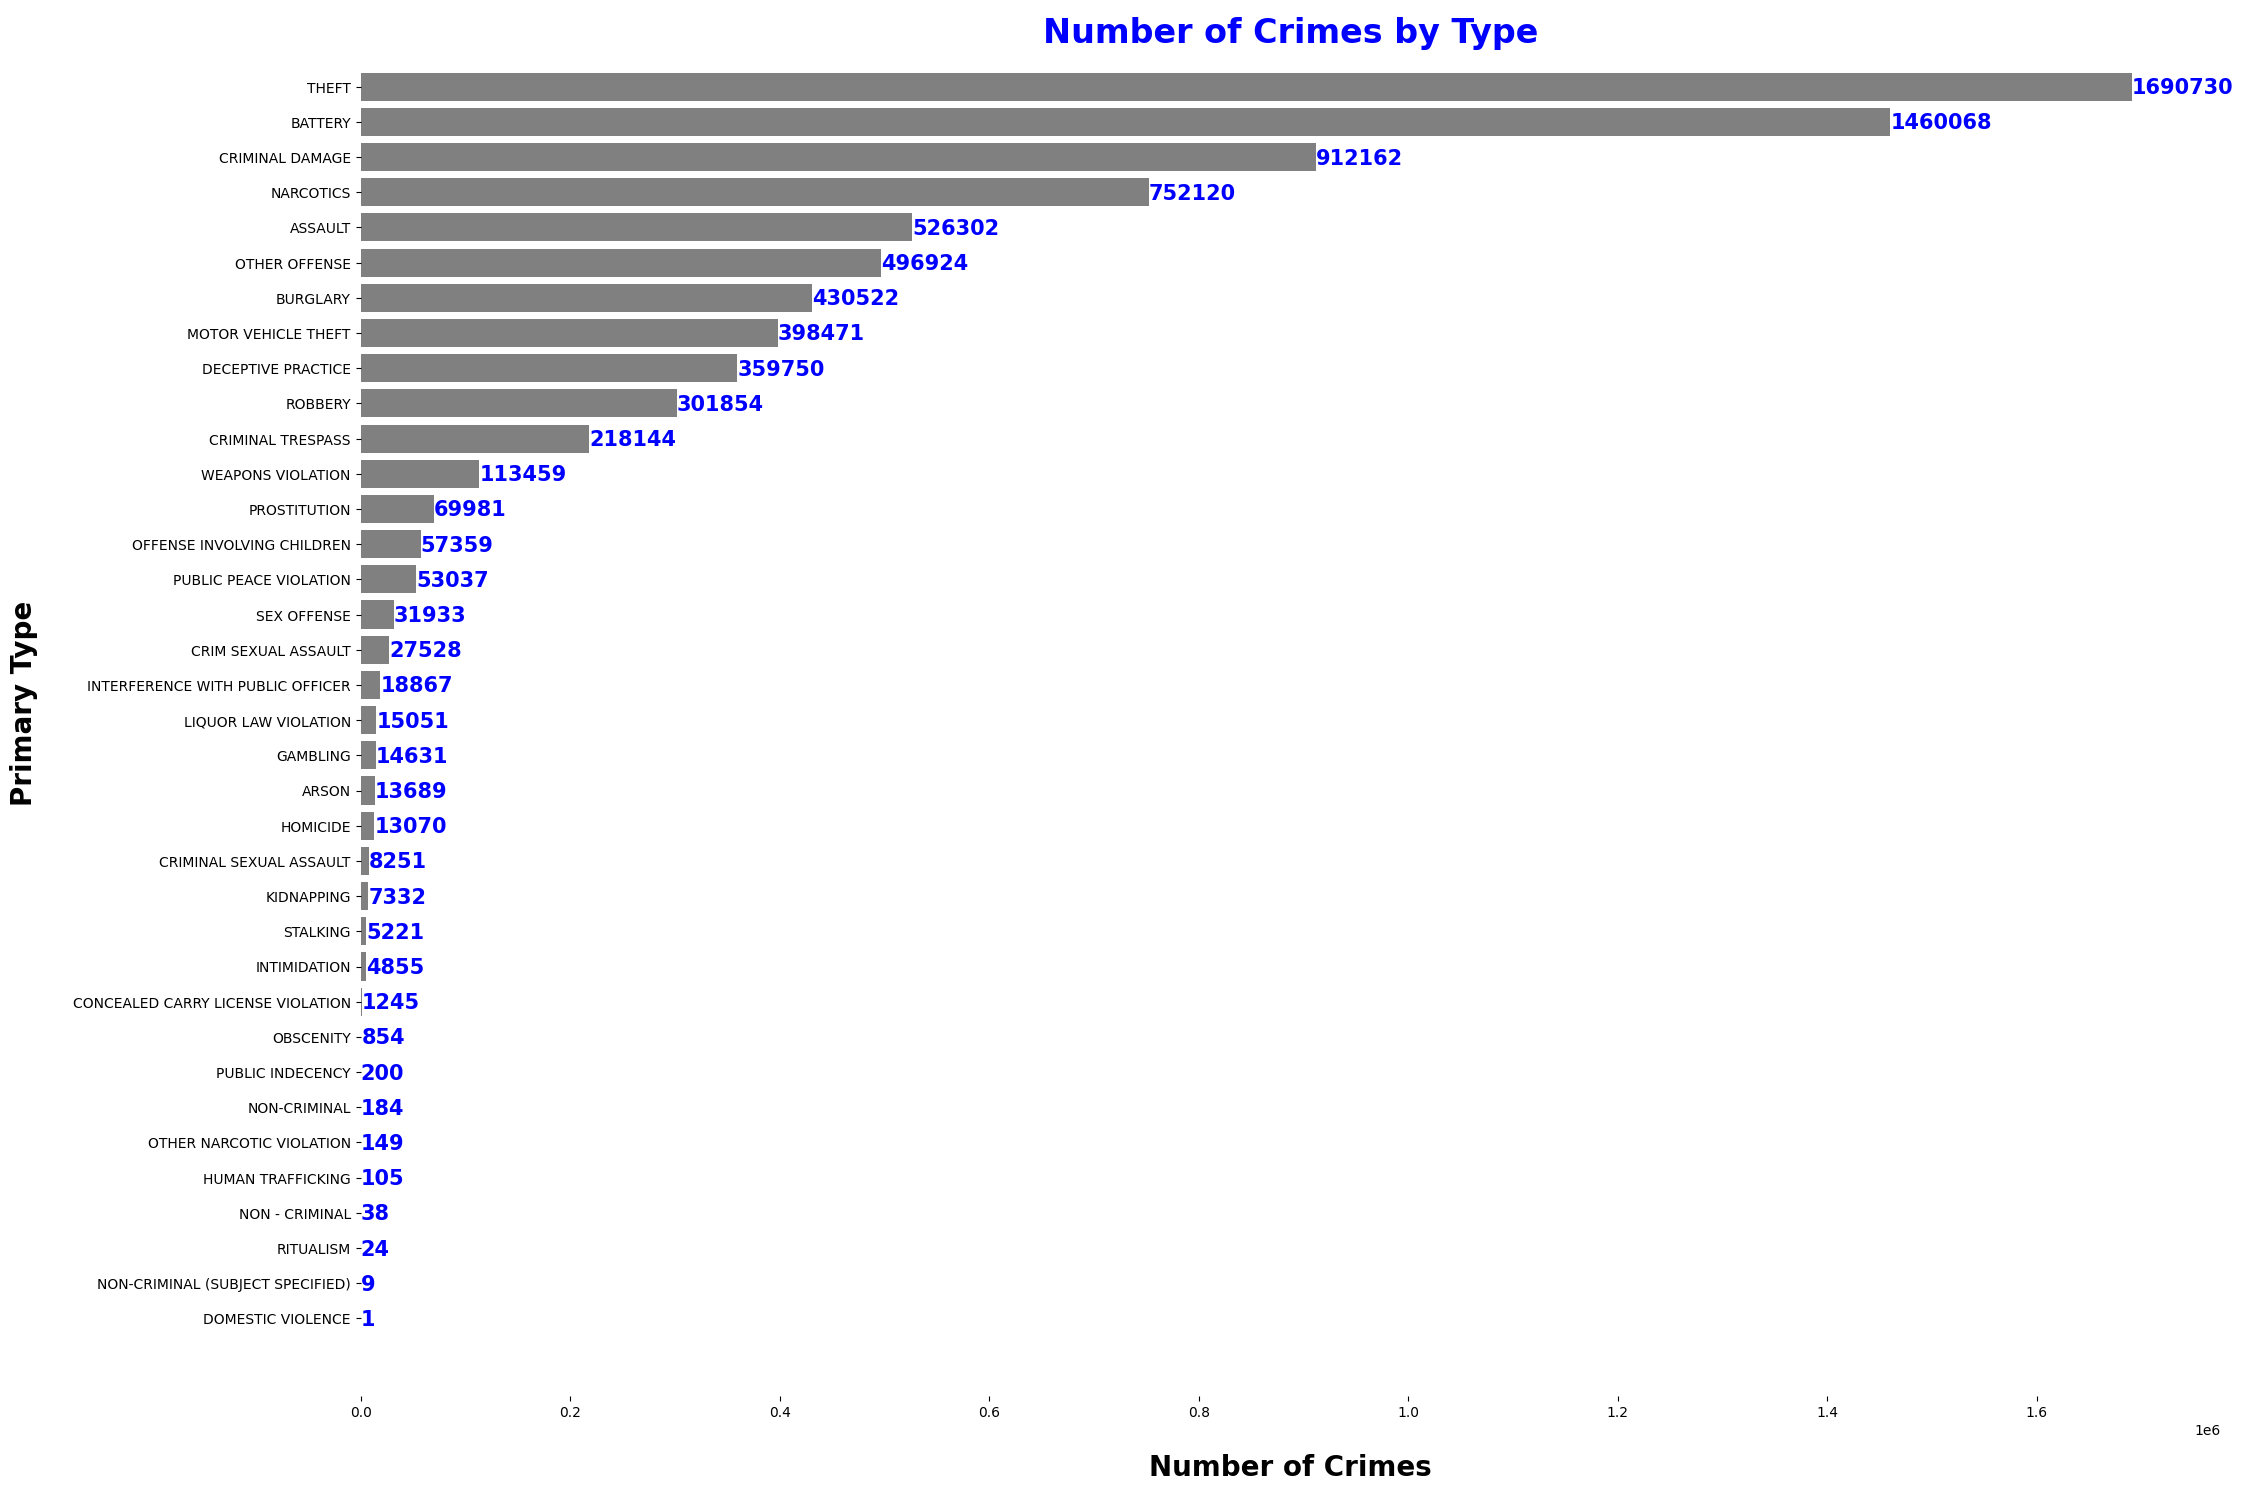

In [ ]:
fig, ax = plt.subplots(figsize = (24,18))
count_by_type = count_by_type.sort_values(by = 'Count_by_Type', ascending = True)
bars = ax.barh(count_by_type['Primary Type'], count_by_type['Count_by_Type'], color = 'grey')

ax.set_xlabel('Number of Crimes', fontsize = 20, fontweight = 'bold', labelpad = 25)
ax.set_ylabel('Primary Type', fontsize = 20, fontweight = 'bold', labelpad = 25)
ax.set_title('Number of Crimes by Type', fontsize = 24, fontweight = 'bold', color = 'blue', x=0.5, y=0.97)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

for i in ax.patches:
    plt.text(i.get_width()+0.8, i.get_y()+0.2,
             str(round((i.get_width()), 2)),
             fontsize = 15, fontweight ='bold',
             color ='blue')


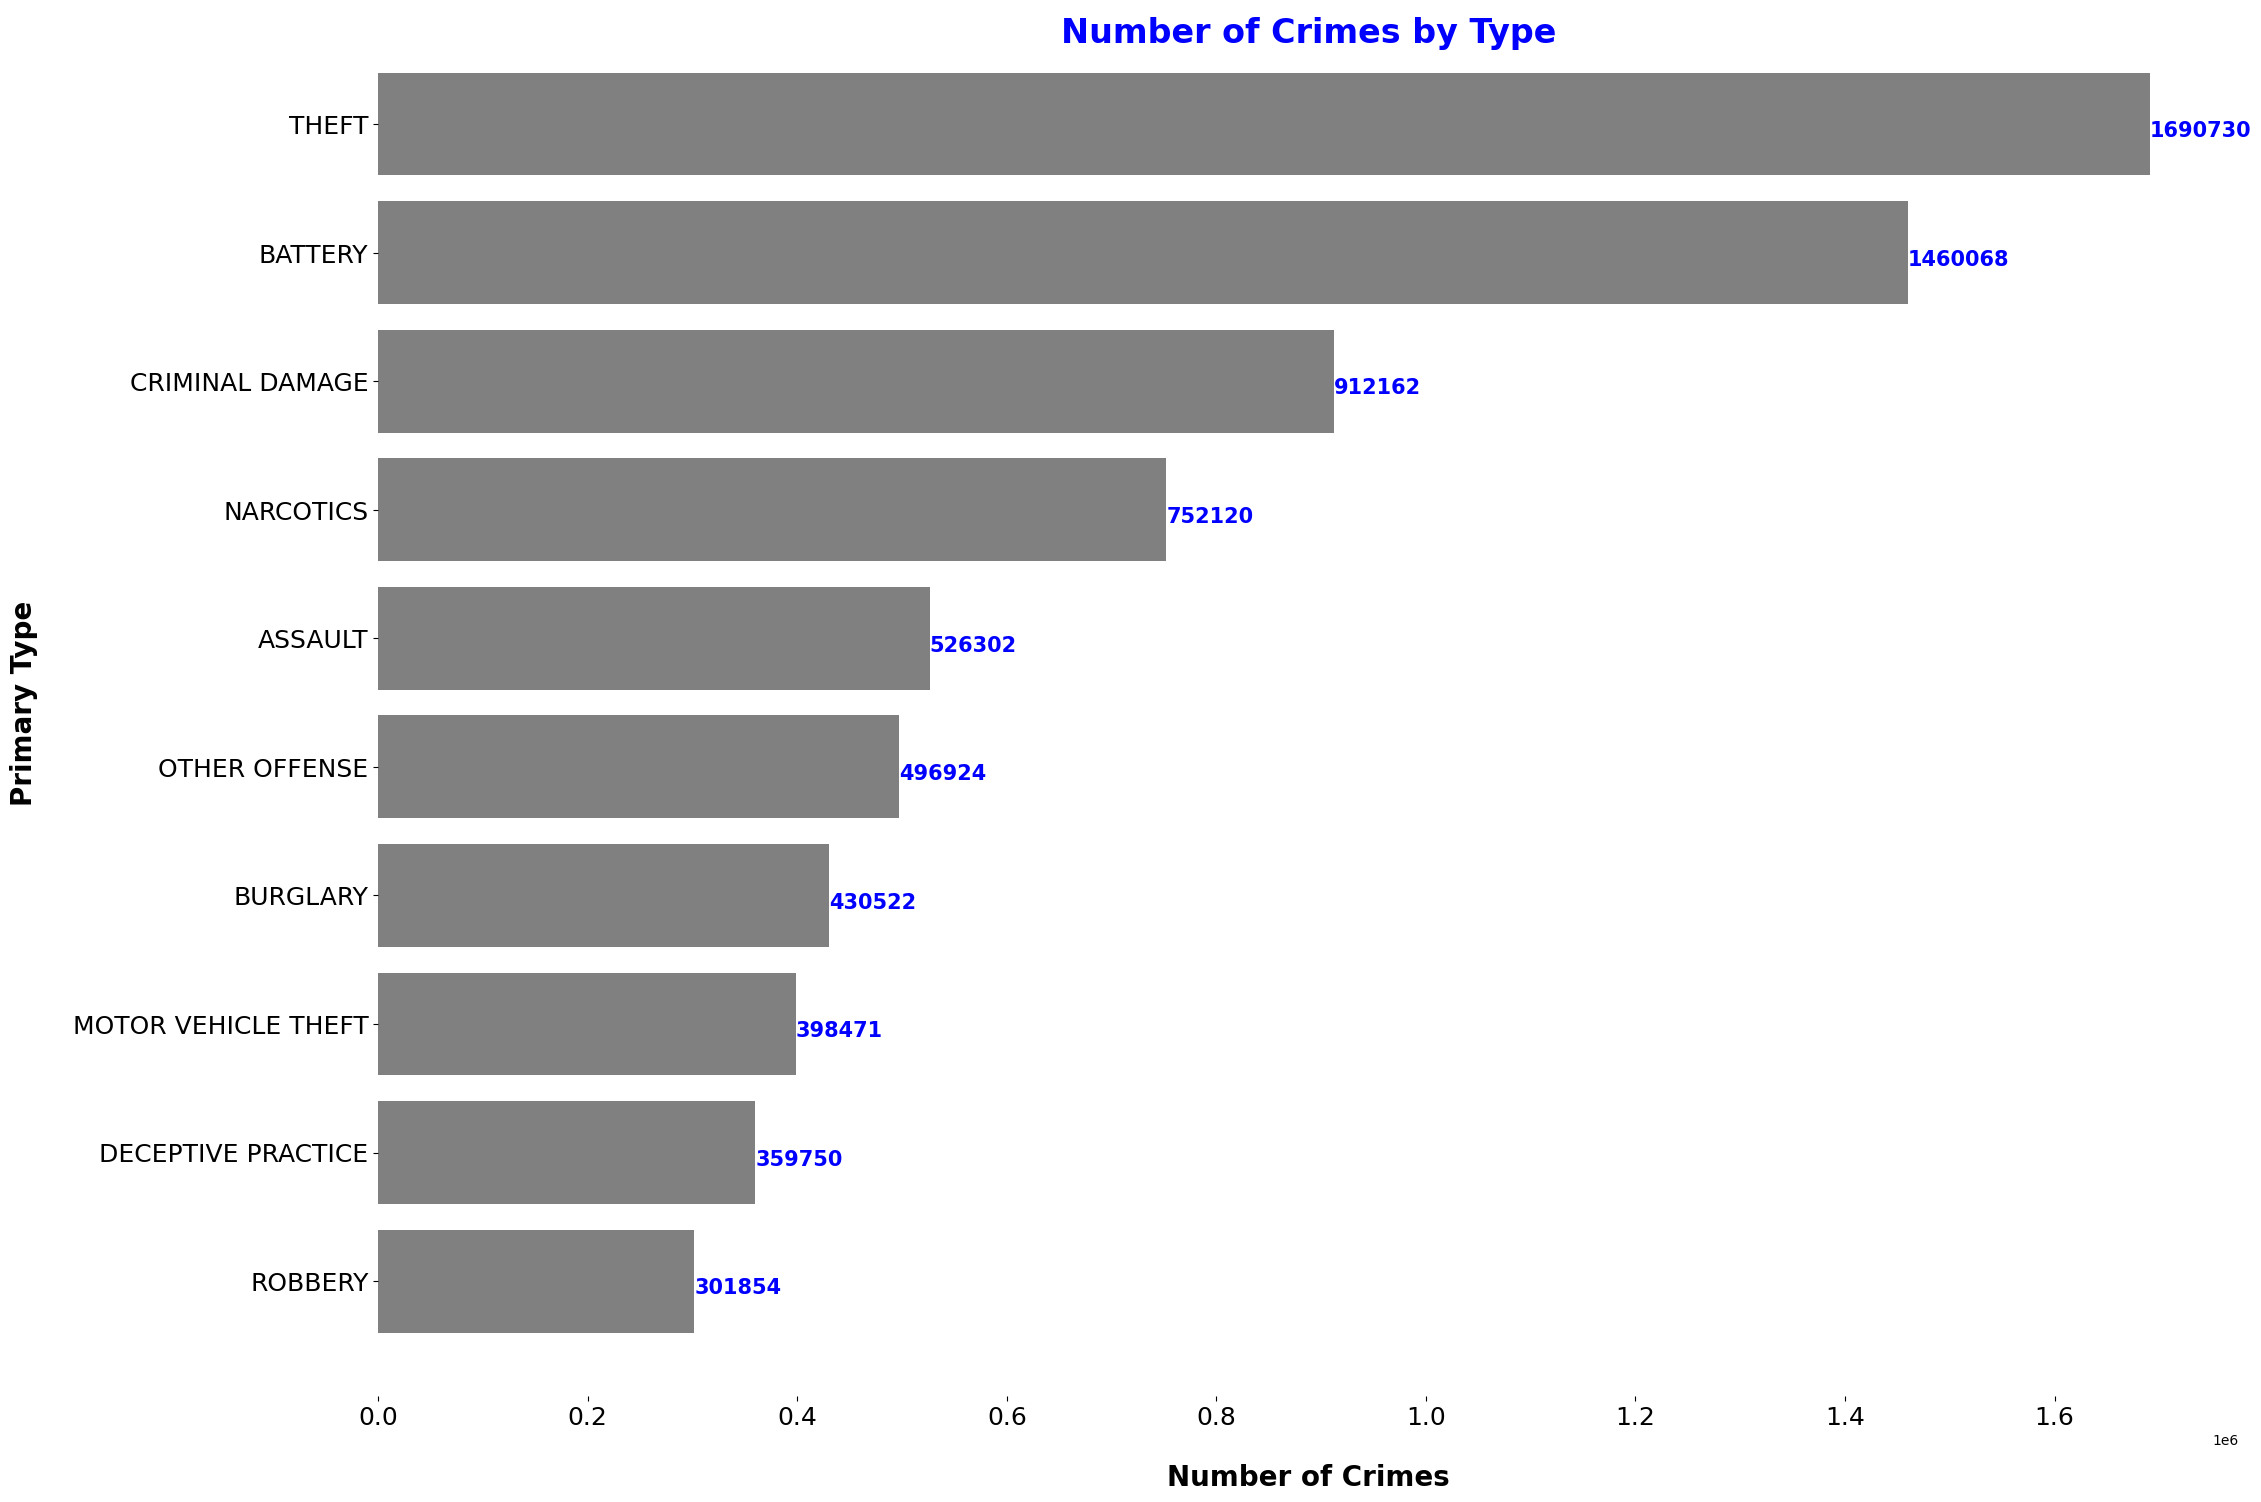

In [ ]:
#Display only top 10 type of crimes
fig, ax = plt.subplots(figsize = (24,18))
top_ten_type = count_by_type.sort_values(by = 'Count_by_Type', ascending = False)[:10]
top_ten_type = top_ten_type.sort_values(by = 'Count_by_Type', ascending = True)
bars = ax.barh(top_ten_type['Primary Type'], top_ten_type['Count_by_Type'], color = 'grey')

ax.set_xlabel('Number of Crimes', fontsize = 20, fontweight = 'bold', labelpad = 25)
ax.set_ylabel('Primary Type', fontsize = 20, fontweight = 'bold', labelpad = 25)
ax.set_title('Number of Crimes by Type', fontsize = 24, fontweight = 'bold', color = 'blue', x=0.5, y=0.97)

ax.tick_params(axis='both', labelsize=18)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

for i in ax.patches:
    plt.text(i.get_width()+0.8, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 15, fontweight ='bold',
             color ='blue')

In [ ]:
#Number of Crimes by Year
count_by_year = crime.groupby('Year').size().reset_index(name = 'Count_by_Year')
count_by_year.sort_values(by='Count_by_Year', ascending = False)

,Year,Count_by_Year
1,2002,486815
0,2001,485904
2,2003,475987
3,2004,469428
4,2005,453777
5,2006,448185
6,2007,437090
7,2008,427195
8,2009,392835
9,2010,370527


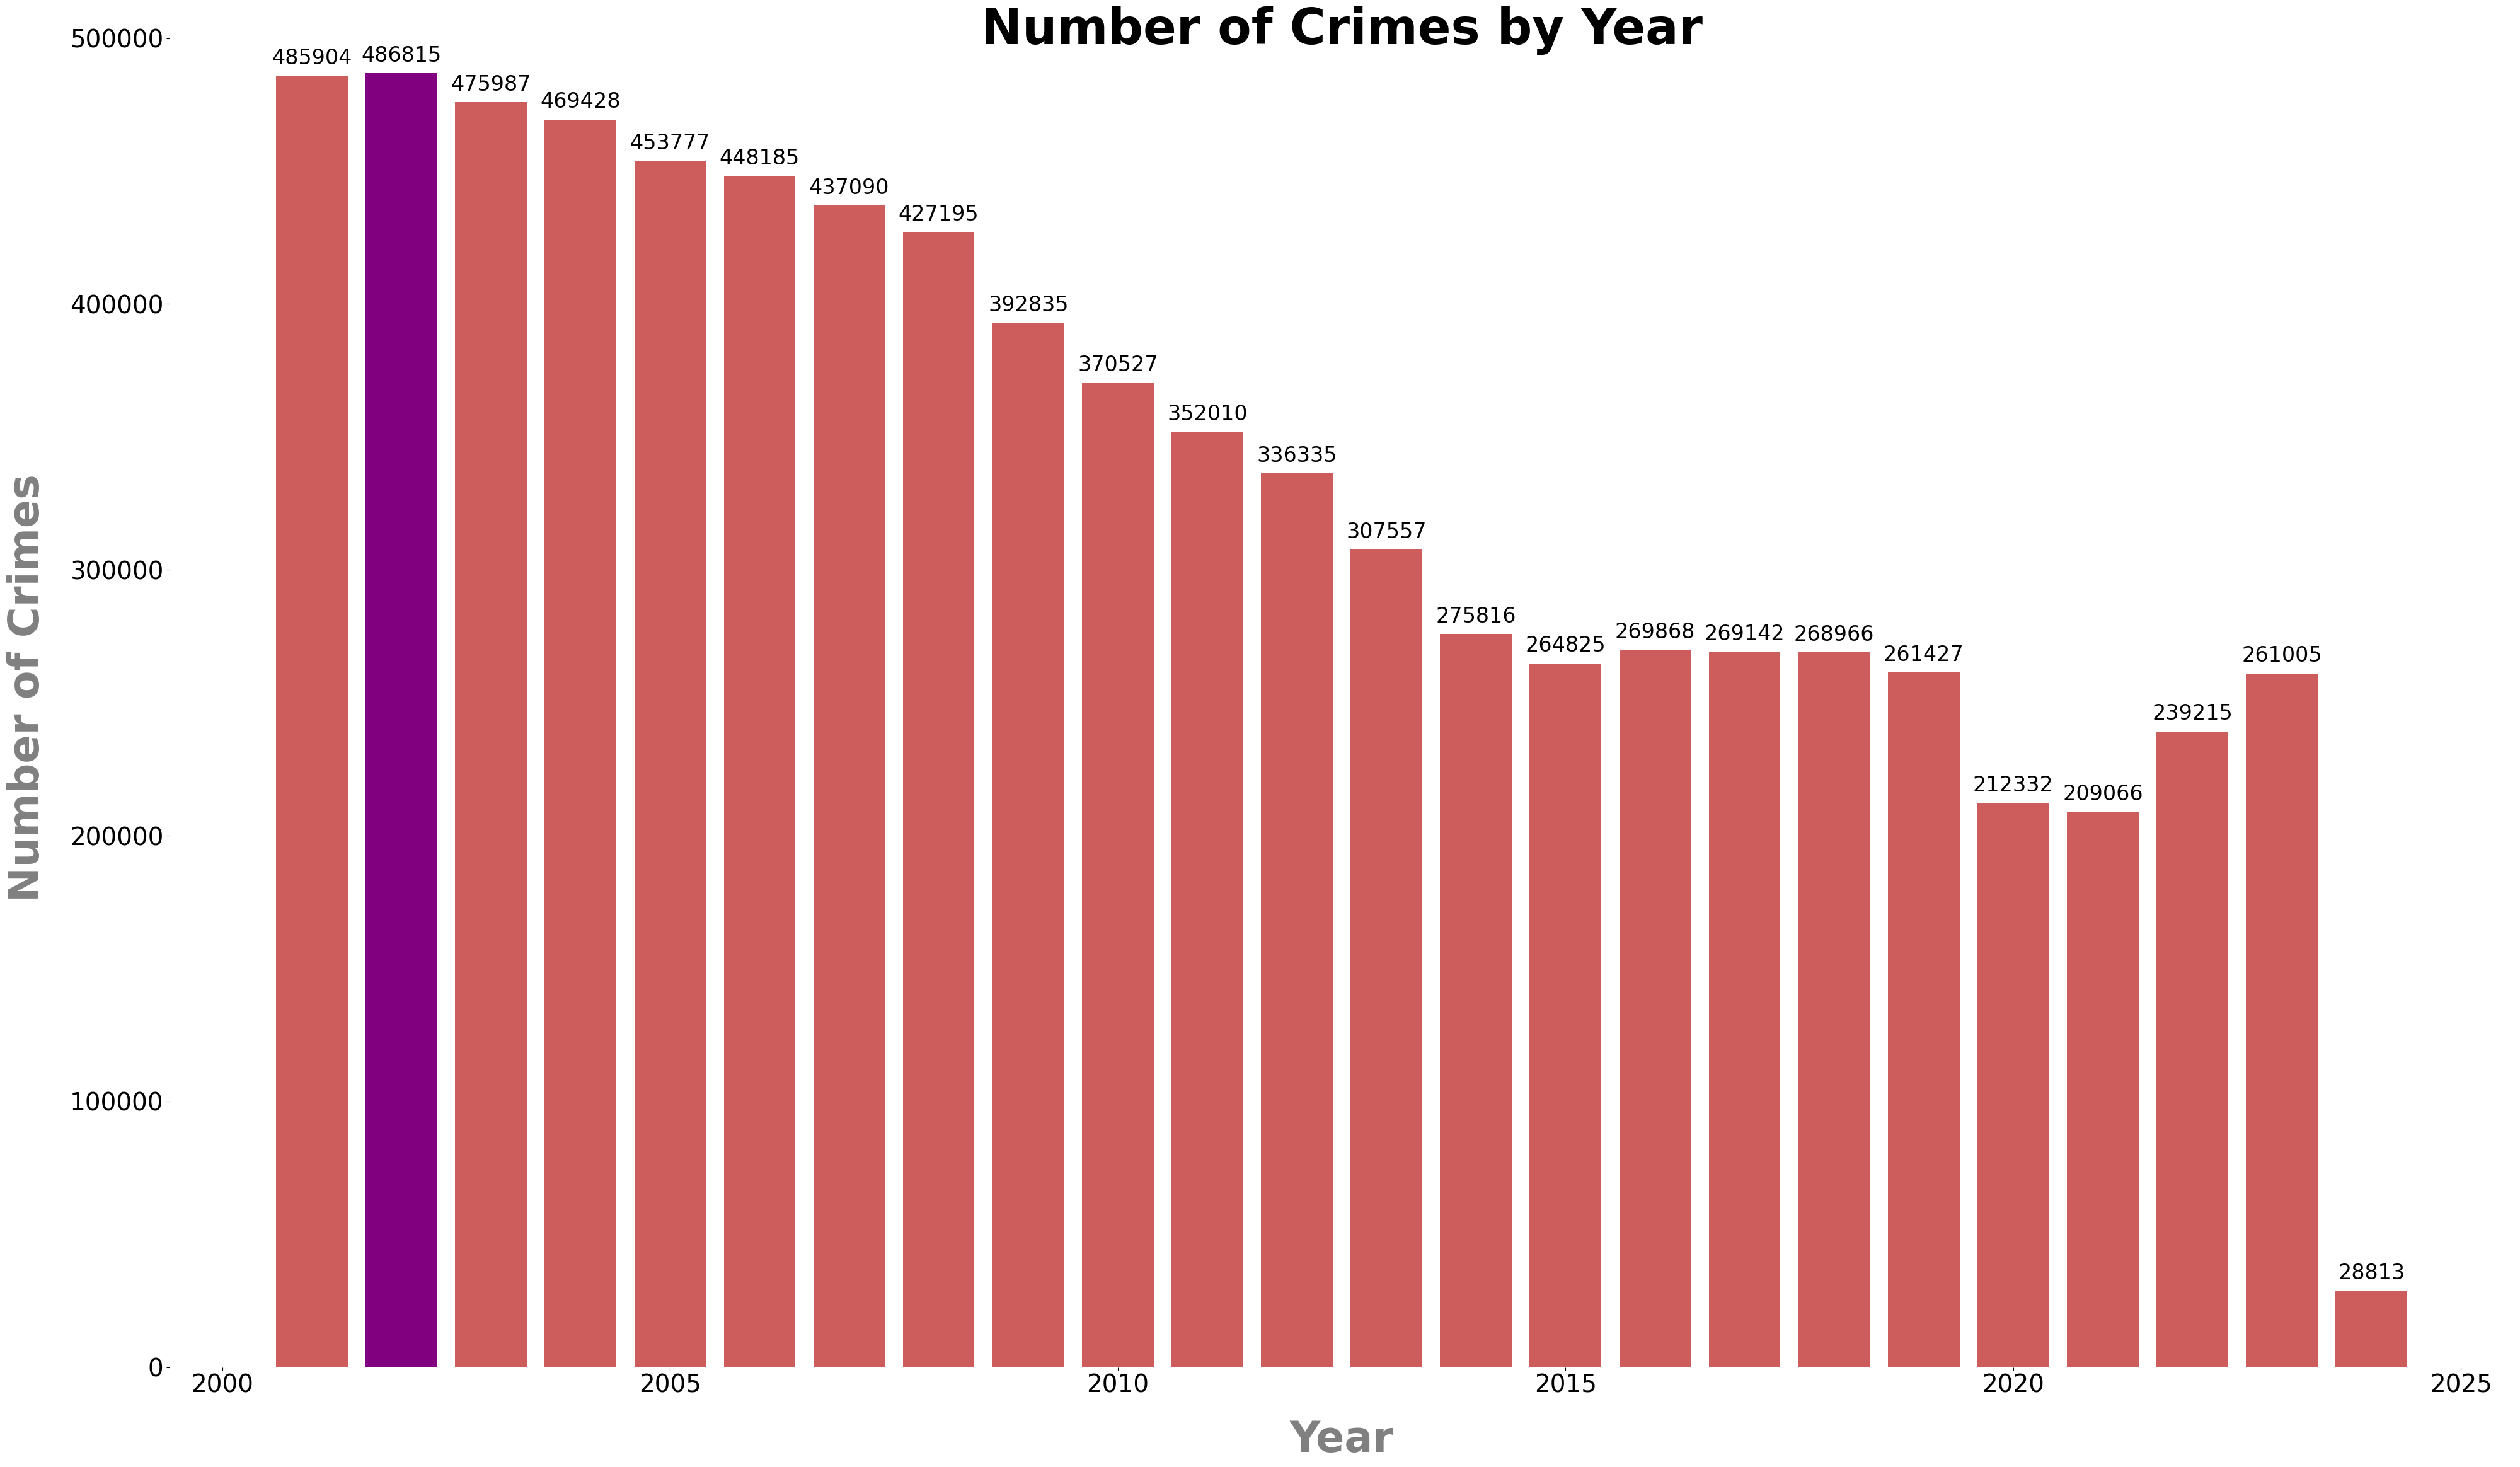

In [ ]:
fig, ax= plt.subplots(figsize = (48,28))
count_by_year = count_by_year.sort_values(by = 'Year', ascending = True)

colors = ['purple' if (bar == max(count_by_year['Count_by_Year'])) else 'indianred' for bar in count_by_year['Count_by_Year']]

plt.bar(count_by_year['Year'], count_by_year['Count_by_Year'], color =colors,
        width = 0.8)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylabel('Number of Crimes', fontsize = 48, fontweight = 'bold', color = 'gray', labelpad = 25)
ax.set_xlabel('Year', fontsize = 48, fontweight = 'bold', color = 'gray', labelpad = 25)
ax.set_title('Number of Crimes by Year', fontsize = 56, fontweight = 'bold', x=0.5, y=0.97)

ax.tick_params(axis='both', labelsize=28)

for i in ax.patches:
    plt.annotate(format(i.get_height(), '.0f'),
                   (i.get_x() + i.get_width() / 2,
                    i.get_height()), ha='center', va='center',
                    size=24, xytext=(0, 20),
                    textcoords='offset points')


In [ ]:
#Number of Crimes by Location
count_by_location = crime.groupby('Location Description').size().reset_index(name = 'Count_by_Location')
count_by_location = count_by_location.sort_values(by='Count_by_Location', ascending = False)
data_table.DataTable(count_by_location, include_index=False, num_rows_per_page=15)

,Location Description,Count_by_Location
189,STREET,2090533
160,RESIDENCE,1332346
17,APARTMENT,920293
184,SIDEWALK,740122
140,OTHER,270015
148,PARKING LOT/GARAGE(NON.RESID.),202969
15,ALLEY,178013
185,SMALL RETAIL STORE,153536
181,"SCHOOL, PUBLIC, BUILDING",146375
165,RESIDENCE-GARAGE,135525


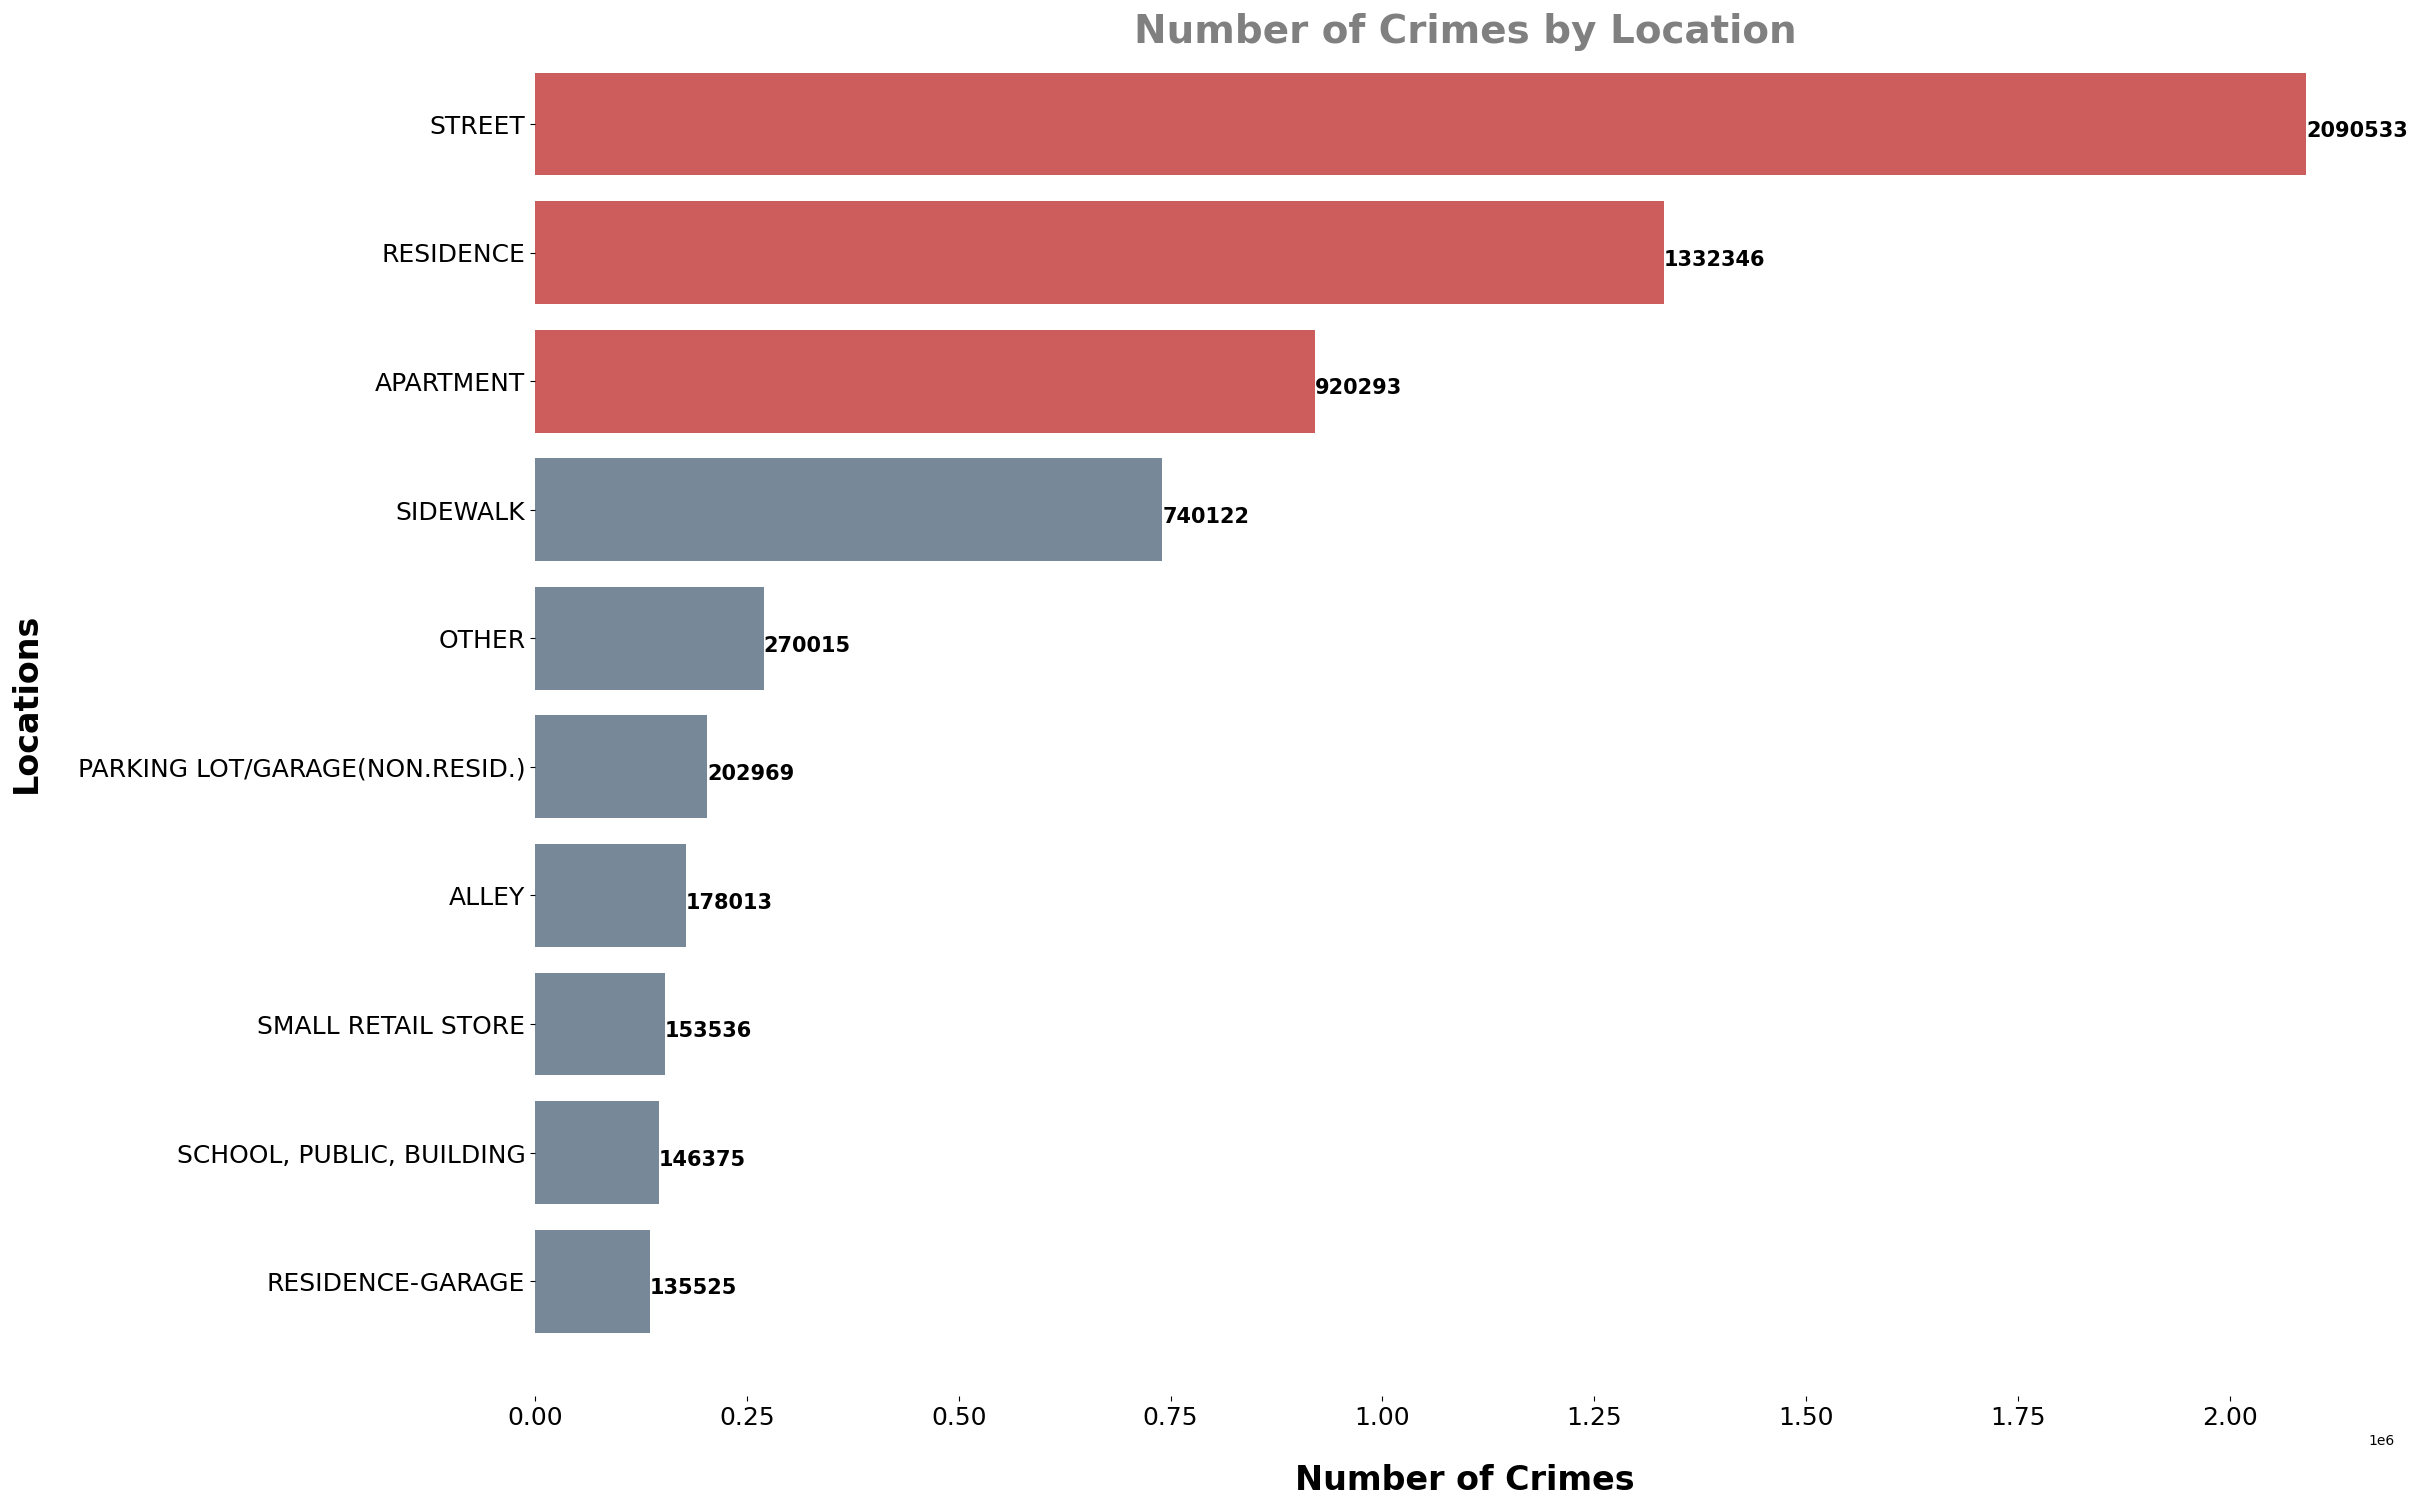

In [ ]:
fig, ax = plt.subplots(figsize = (24,18))
top_ten_location = count_by_location[:10]
top_ten_location = top_ten_location.sort_values(by='Count_by_Location', ascending = True)
colors_location = ['lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'indianred','indianred','indianred']
bars = ax.barh(top_ten_location['Location Description'], top_ten_location['Count_by_Location'], color = colors_location)

ax.set_xlabel('Number of Crimes', fontsize = 24, fontweight = 'bold', labelpad = 25)
ax.set_ylabel('Locations', fontsize = 24, fontweight = 'bold', labelpad = 25)
ax.set_title('Number of Crimes by Location', fontsize = 28, fontweight = 'bold', color = 'grey', x=0.5, y=0.97)

ax.tick_params(axis='both', labelsize=18)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

for i in ax.patches:
    plt.text(i.get_width()+0.8, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 15, fontweight ='bold',
             color ='black')

In [ ]:
#Crime Type by Location - Highest to Lowest
type_by_loc = crime.groupby(['Primary Type', 'Location Description']).size().reset_index(name = 'Count_by_Location')
type_by_loc = type_by_loc.sort_values(by='Count_by_Location', ascending = False)
data_table.DataTable(type_by_loc, include_index=False, num_rows_per_page=15)

,Primary Type,Location Description,Count_by_Location
3043,THEFT,STREET,457335
778,CRIMINAL DAMAGE,STREET,329467
258,BATTERY,APARTMENT,311384
1787,MOTOR VEHICLE THEFT,STREET,310672
343,BATTERY,RESIDENCE,299452
...,...,...,...
1947,NON-CRIMINAL,AIRPORT PARKING LOT,1
2593,ROBBERY,BOAT / WATERCRAFT,1
1950,NON-CRIMINAL,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,1
2890,STALKING,PAWN SHOP,1


In [ ]:
#Crime Type by Year - Highest to Lowest
type_by_year = crime.groupby(['Primary Type', 'Year']).size().reset_index(name = 'Count')
type_by_year = type_by_year.sort_values(by = 'Count', ascending = False)
data_table.DataTable(type_by_year, include_index=False, num_rows_per_page=15)

,Primary Type,Year,Count
700,THEFT,2001,99280
702,THEFT,2003,98876
701,THEFT,2002,98334
703,THEFT,2004,95464
49,BATTERY,2002,94153
...,...,...,...
224,DOMESTIC VIOLENCE,2001,1
444,NON-CRIMINAL,2020,1
272,HUMAN TRAFFICKING,2010,1
96,CONCEALED CARRY LICENSE VIOLATION,2001,1


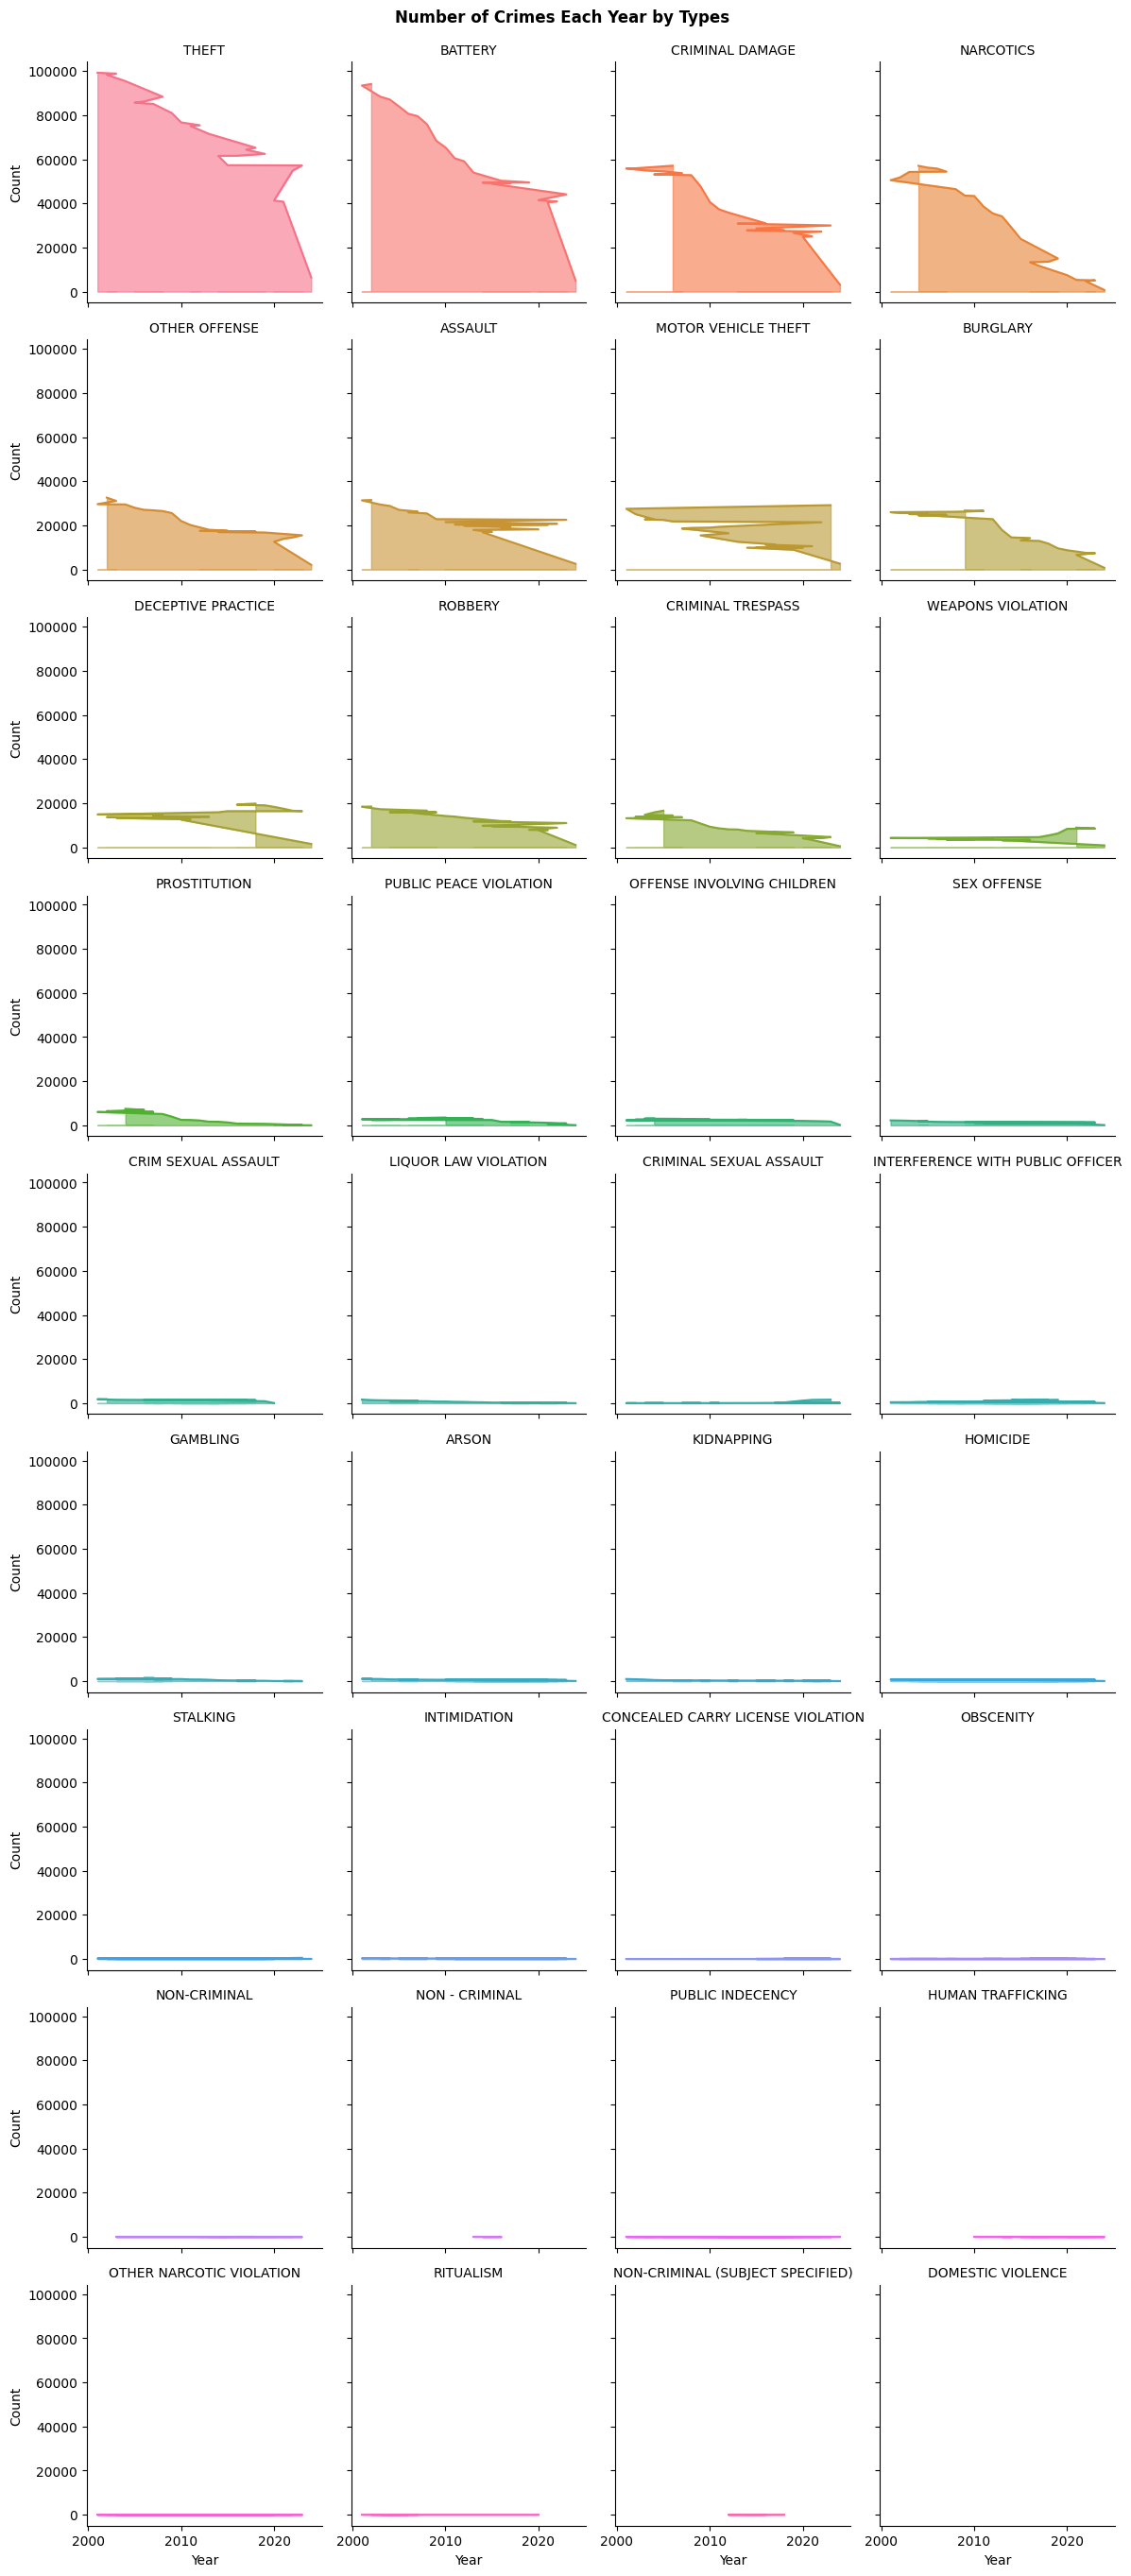

In [ ]:
grid = sns.FacetGrid(type_by_year, col='Primary Type', hue='Primary Type', col_wrap=4)
grid = grid.map(plt.plot, 'Year', 'Count')
grid = grid.map(plt.fill_between, 'Year', 'Count', alpha=0.6).set_titles("{col_name}")
grid = grid.fig.suptitle('Number of Crimes Each Year by Types', x=0.5, y=1.008, fontweight = 'bold')

In [ ]:
#Number of Arrests Made per Year
arrest_by_year = crime.groupby(['Arrest', 'Year']).size().reset_index(name='Count')
arrest_by_year = arrest_by_year.query('Arrest == True')[['Year', 'Count']]
arrest_by_year

,Year,Count
24,2001,141937
25,2002,141569
26,2003,141595
27,2004,144704
28,2005,140926
29,2006,135422
30,2007,131879
31,2008,110026
32,2009,110835
33,2010,100551


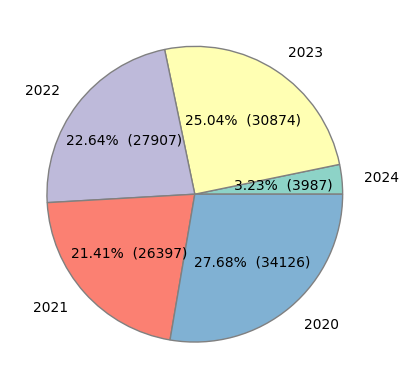

In [ ]:
recent_five_year = arrest_by_year.sort_values(by='Year', ascending = False)
recent_five_year = recent_five_year[:5]

def autopct_f(values):
    def percentage(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return percentage

plt.pie(recent_five_year['Count'],labels = recent_five_year['Year'], autopct = autopct_f(recent_five_year['Count']), colors=sns.color_palette('Set3'), labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'gray' })

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

In [ ]:
#Arrests Made Each Year per Crime Type
arrest_year_type = crime.groupby(['Arrest', 'Year', 'Primary Type']).size().reset_index(name = 'Count')
arrest_year_type = arrest_year_type.query('Arrest == True')[['Year', 'Primary Type', 'Count']]
arrest_year_type
data_table.DataTable(arrest_year_type, include_index=False, num_rows_per_page=15)

,Year,Primary Type,Count
698,2001,ARSON,181
699,2001,ASSAULT,7150
700,2001,BATTERY,20464
701,2001,BURGLARY,1695
702,2001,CONCEALED CARRY LICENSE VIOLATION,1
...,...,...,...
1415,2024,ROBBERY,39
1416,2024,SEX OFFENSE,6
1417,2024,STALKING,3
1418,2024,THEFT,429


In [ ]:
#Crime Type of Which the Most Arrests Made Every Year
highest_each_year = arrest_year_type.loc[arrest_year_type.groupby('Year')['Count'].idxmax()]
highest_each_year[['Year', 'Primary Type', 'Count']]

,Year,Primary Type,Count
716,2001,NARCOTICS,50559
746,2002,NARCOTICS,51781
776,2003,NARCOTICS,54283
805,2004,NARCOTICS,57034
834,2005,NARCOTICS,56121
863,2006,NARCOTICS,55236
893,2007,NARCOTICS,53251
922,2008,NARCOTICS,45482
951,2009,NARCOTICS,43214
980,2010,NARCOTICS,43299


In [ ]:
#Arrest by FBI code
arrest_by_FBICode = crime.groupby(['Arrest', 'Year', 'FBI Code']).size().reset_index(name = 'Count')
arrest_by_FBICode = arrest_by_FBICode.query('Arrest==True').sort_values(by='Count', ascending = False)[['Year', 'FBI Code', 'Count']]
data_table.DataTable(arrest_by_FBICode, include_index=False, num_rows_per_page=15)

,Year,FBI Code,Count
693,2004,18,52784
719,2005,18,51890
745,2006,18,51091
667,2003,18,50252
770,2007,18,49334
...,...,...,...
878,2012,01B,1
1190,2024,02,1
852,2011,01B,1
1059,2018,27,1


In [ ]:
#Most arrests by FBI code every year
highest_by_FBICode = arrest_by_FBICode.loc[arrest_by_FBICode.groupby('Year')['Count'].idxmax()]
highest_by_FBICode

,Year,FBI Code,Count
616,2001,18,47011
641,2002,18,47908
667,2003,18,50252
693,2004,18,52784
719,2005,18,51890
745,2006,18,51091
770,2007,18,49334
795,2008,18,42576
820,2009,18,40458
845,2010,18,41017


In [ ]:
#Crime type by community
crime['Community_Area_New'] = pd.to_numeric(crime['Community Area'])
crime['Community_Area_New'] = crime['Community_Area_New'].astype("Int64")
type_by_community = crime.groupby(['Community_Area_New', 'Primary Type']).size().reset_index(name = 'Count')
data_table.DataTable(type_by_community, include_index=False, num_rows_per_page=15)

,Community_Area_New,Primary Type,Count
0,0,ASSAULT,3
1,0,BATTERY,13
2,0,CRIM SEXUAL ASSAULT,1
3,0,CRIMINAL DAMAGE,12
4,0,CRIMINAL TRESPASS,3
...,...,...,...
2410,77,ROBBERY,2483
2411,77,SEX OFFENSE,400
2412,77,STALKING,60
2413,77,THEFT,21757


In [5]:
crime['Community_Area_New'] = pd.to_numeric(crime['Community Area'])
crime['Community_Area_New'] = crime['Community_Area_New'].astype("Int64")
count_by_community = crime.groupby(['Community_Area_New']).size().reset_index(name = 'Count_by_Community_Area')
count_by_community.sort_values(by='Count_by_Community_Area', ascending = False, inplace=True)
data_table.DataTable(count_by_community, include_index=False, num_rows_per_page=15)

,Community_Area_New,Count_by_Community_Area
25,25,458855
8,8,262172
43,43,243595
23,23,229927
28,28,225684
24,24,216901
29,29,215761
67,67,209017
71,71,208784
49,49,195647


In [3]:
sesdata = pd.read_csv('/content/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012_20240224.csv')

In [6]:
top_ten_community = count_by_community[:10]
sesdata['Community Area Number'] = sesdata['Community Area Number'].astype("Int64")
top_ten_community = top_ten_community.merge(sesdata, left_on='Community_Area_New', right_on='Community Area Number').drop(['Community_Area_New', 'Community Area Number'], axis=1)
top_ten_community[:10].style.hide_index()

<ipython-input-6-9f019099ea74>:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  top_ten_community[:10].style.hide_index()


Count_by_Community_Area,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
458855,Austin,6.300000,28.600000,22.600000,24.400000,37.900000,15957,73.000000
262172,Near North Side,1.900000,12.900000,7.000000,2.500000,22.600000,88669,1.000000
243595,South Shore,2.800000,31.100000,20.000000,14.000000,35.700000,19398,55.000000
229927,Humboldt park,14.800000,33.900000,17.300000,35.400000,38.000000,13781,85.000000
225684,Near West Side,3.800000,20.600000,10.700000,9.600000,22.200000,44689,15.000000
216901,West Town,2.300000,14.700000,6.600000,12.900000,21.700000,43198,10.000000
215761,North Lawndale,7.400000,43.100000,21.200000,27.600000,42.700000,12034,87.000000
209017,West Englewood,4.800000,34.400000,35.900000,26.300000,40.700000,11317,89.000000
208784,Auburn Gresham,4.000000,27.600000,28.300000,18.500000,41.900000,15528,74.000000
195647,Roseland,2.500000,19.800000,20.300000,16.900000,41.200000,17949,52.000000


In [ ]:
#Highest count of crime type in each community
highest_by_community = type_by_community.loc[type_by_community.groupby(['Community_Area_New'])['Count'].idxmax()]
data_table.DataTable(highest_by_community, include_index=False, num_rows_per_page=15)

,Community_Area_New,Primary Type,Count
10,0,THEFT,18
41,1,THEFT,25754
73,2,THEFT,23371
104,3,THEFT,27300
135,4,THEFT,14941
164,5,THEFT,13806
196,6,THEFT,56275
228,7,THEFT,51056
262,8,THEFT,107967
289,9,THEFT,1565


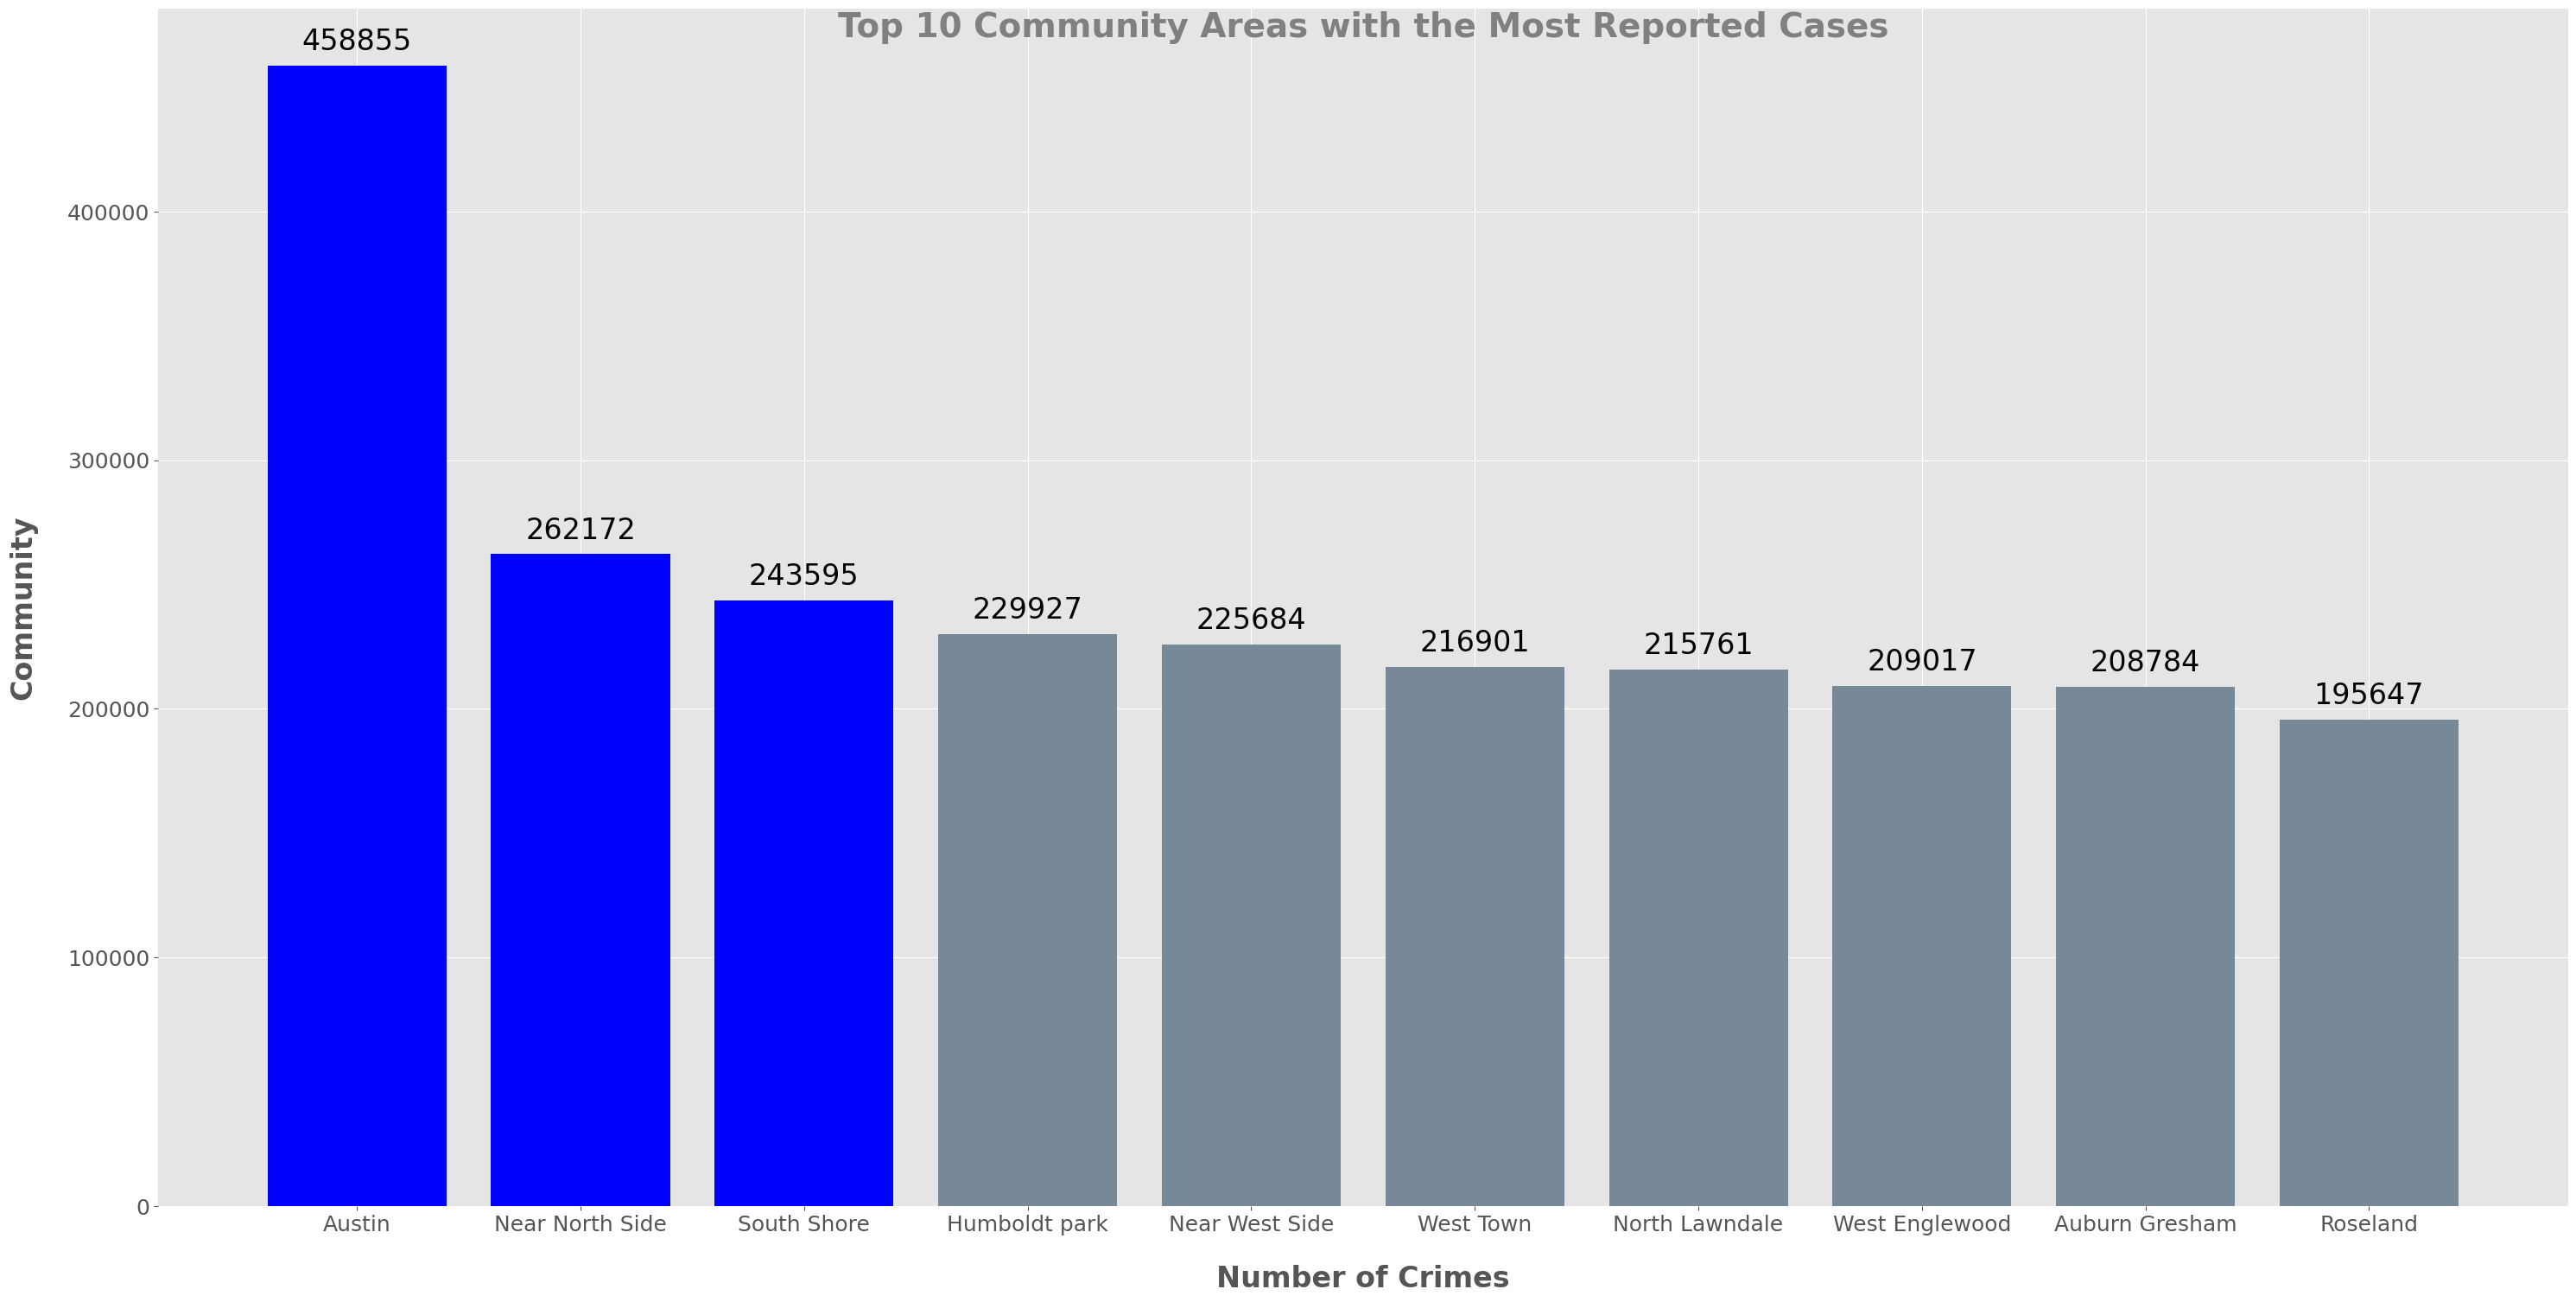

In [ ]:
ten_community = top_ten_community[['COMMUNITY AREA NAME', 'Count_by_Community_Area']]
fig, ax = plt.subplots(figsize = (36,18))
colors_location = ['Blue', 'Blue', 'Blue', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey']
bars = ax.bar(ten_community['COMMUNITY AREA NAME'], ten_community['Count_by_Community_Area'], color = colors_location)

ax.set_xlabel('Number of Crimes', fontsize = 24, fontweight = 'bold', labelpad = 25)
ax.set_ylabel('Community', fontsize = 24, fontweight = 'bold', labelpad = 25)
ax.set_title('Top 10 Community Areas with the Most Reported Cases', fontsize = 28, fontweight = 'bold', color = 'grey', x=0.5, y=0.97)

ax.tick_params(axis='both', labelsize=18)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

for i in ax.patches:
    plt.annotate(format(i.get_height(), '.0f'),
                   (i.get_x() + i.get_width() / 2,
                    i.get_height()), ha='center', va='center',
                    size=24, xytext=(0, 20),
                    textcoords='offset points')

In [7]:
sesdata.columns

Index(['Community Area Number', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

In [10]:
sesdata['Community Area Number'] = sesdata['Community Area Number'].astype("Int64")

In [12]:
crime['Community Area'] = crime['Community Area'].astype("Int64")

In [13]:
crimedata = crime.merge(sesdata, left_on='Community Area', right_on='Community Area Number')
crimedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8004044 entries, 0 to 8004043
Data columns (total 32 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   ID                                            int64  
 1   Case Number                                   object 
 2   Date                                          object 
 3   Block                                         object 
 4   IUCR                                          object 
 5   Primary Type                                  object 
 6   Description                                   object 
 7   Location Description                          object 
 8   Arrest                                        bool   
 9   Domestic                                      bool   
 10  Beat                                          int64  
 11  District                                      float64
 12  Ward                                          float64
 1

In [ ]:
crimedata.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Community_Area_New,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,1.0,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN,32,32.0,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0
1,11642709,JC208560,03/31/2019 11:00:00 AM,0000X E MONROE ST,0890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,112,1.0,42.0,32.0,06,NaN,NaN,2019,04/07/2019 04:05:59 PM,NaN,NaN,NaN,32,32.0,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0
2,11650067,JC218386,07/28/2013 12:00:00 PM,003XX S MICHIGAN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,113,1.0,42.0,32.0,11,NaN,NaN,2013,04/10/2019 04:14:14 PM,NaN,NaN,NaN,32,32.0,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0
3,11645224,JC212415,04/05/2019 07:10:00 AM,001XX W IDA B WELLS DR,0810,THEFT,OVER $500,CTA TRAIN,False,False,121,1.0,4.0,32.0,06,NaN,NaN,2019,04/12/2019 04:08:18 PM,NaN,NaN,NaN,32,32.0,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0
4,11651465,JC219013,11/18/2018 09:00:00 AM,003XX E RANDOLPH ST,1140,DECEPTIVE PRACTICE,EMBEZZLEMENT,COMMERCIAL / BUSINESS OFFICE,False,False,114,1.0,42.0,32.0,12,NaN,NaN,2018,04/11/2019 04:07:22 PM,NaN,NaN,NaN,32,32.0,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0


In [14]:
sesstatus = crimedata[['Community Area Number', 'COMMUNITY AREA NAME', 'Case Number', 'Date', 'Year',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX']]
sesstatus = sesstatus[(sesstatus['Year'] <=2012) & (sesstatus['Year'] >=2008)]
sesstatus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878877 entries, 48 to 8003457
Data columns (total 12 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   Community Area Number                         Int64  
 1   COMMUNITY AREA NAME                           object 
 2   Case Number                                   object 
 3   Date                                          object 
 4   Year                                          int64  
 5   PERCENT OF HOUSING CROWDED                    float64
 6   PERCENT HOUSEHOLDS BELOW POVERTY              float64
 7   PERCENT AGED 16+ UNEMPLOYED                   float64
 8   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  float64
 9   PERCENT AGED UNDER 18 OR OVER 64              float64
 10  PER CAPITA INCOME                             int64  
 11  HARDSHIP INDEX                                float64
dtypes: Int64(1), float64(6), int64(2), object(3)
memory usa

In [15]:
ses = sesstatus.groupby('Community Area Number')['Case Number'].size().reset_index(name = 'Total')
ses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Community Area Number  77 non-null     Int64
 1   Total                  77 non-null     int64
dtypes: Int64(1), int64(1)
memory usage: 1.4 KB


In [16]:
merged_sesdata = ses.merge(sesstatus, left_on = 'Community Area Number', right_on = 'Community Area Number')
merged_sesdata.drop('Case Number', axis = 1, inplace=True)
merged_sesdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878023 entries, 0 to 1878022
Data columns (total 12 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   Community Area Number                         Int64  
 1   Total                                         int64  
 2   COMMUNITY AREA NAME                           object 
 3   Date                                          object 
 4   Year                                          int64  
 5   PERCENT OF HOUSING CROWDED                    float64
 6   PERCENT HOUSEHOLDS BELOW POVERTY              float64
 7   PERCENT AGED 16+ UNEMPLOYED                   float64
 8   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  float64
 9   PERCENT AGED UNDER 18 OR OVER 64              float64
 10  PER CAPITA INCOME                             int64  
 11  HARDSHIP INDEX                                float64
dtypes: Int64(1), float64(6), int64(3), object(2)
memory usag

In [17]:
merged_sesdata.isnull().sum()

Community Area Number                           0
Total                                           0
COMMUNITY AREA NAME                             0
Date                                            0
Year                                            0
PERCENT OF HOUSING CROWDED                      0
PERCENT HOUSEHOLDS BELOW POVERTY                0
PERCENT AGED 16+ UNEMPLOYED                     0
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0
PERCENT AGED UNDER 18 OR OVER 64                0
PER CAPITA INCOME                               0
HARDSHIP INDEX                                  0
dtype: int64

<ipython-input-128-eb28ebbbb5df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_sesdata.corr(), annot=True)


<Figure size 3500x1800 with 0 Axes>

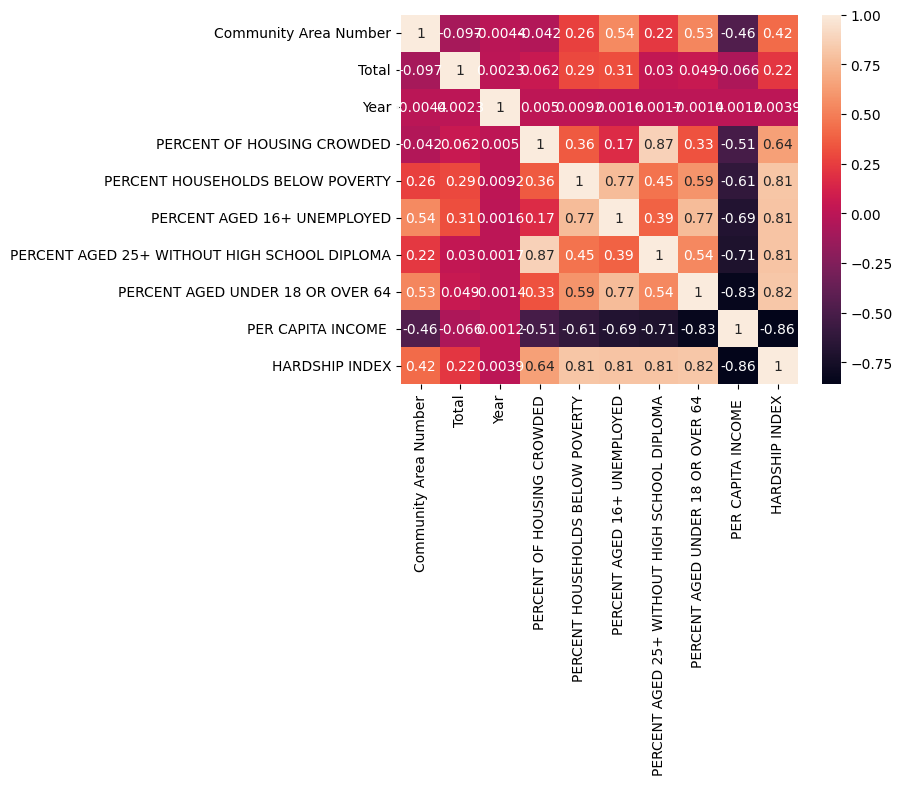

<Figure size 3500x1800 with 0 Axes>

In [ ]:
sns.heatmap(merged_sesdata.corr(), annot=True)
plt.figure(figsize=(35,18))

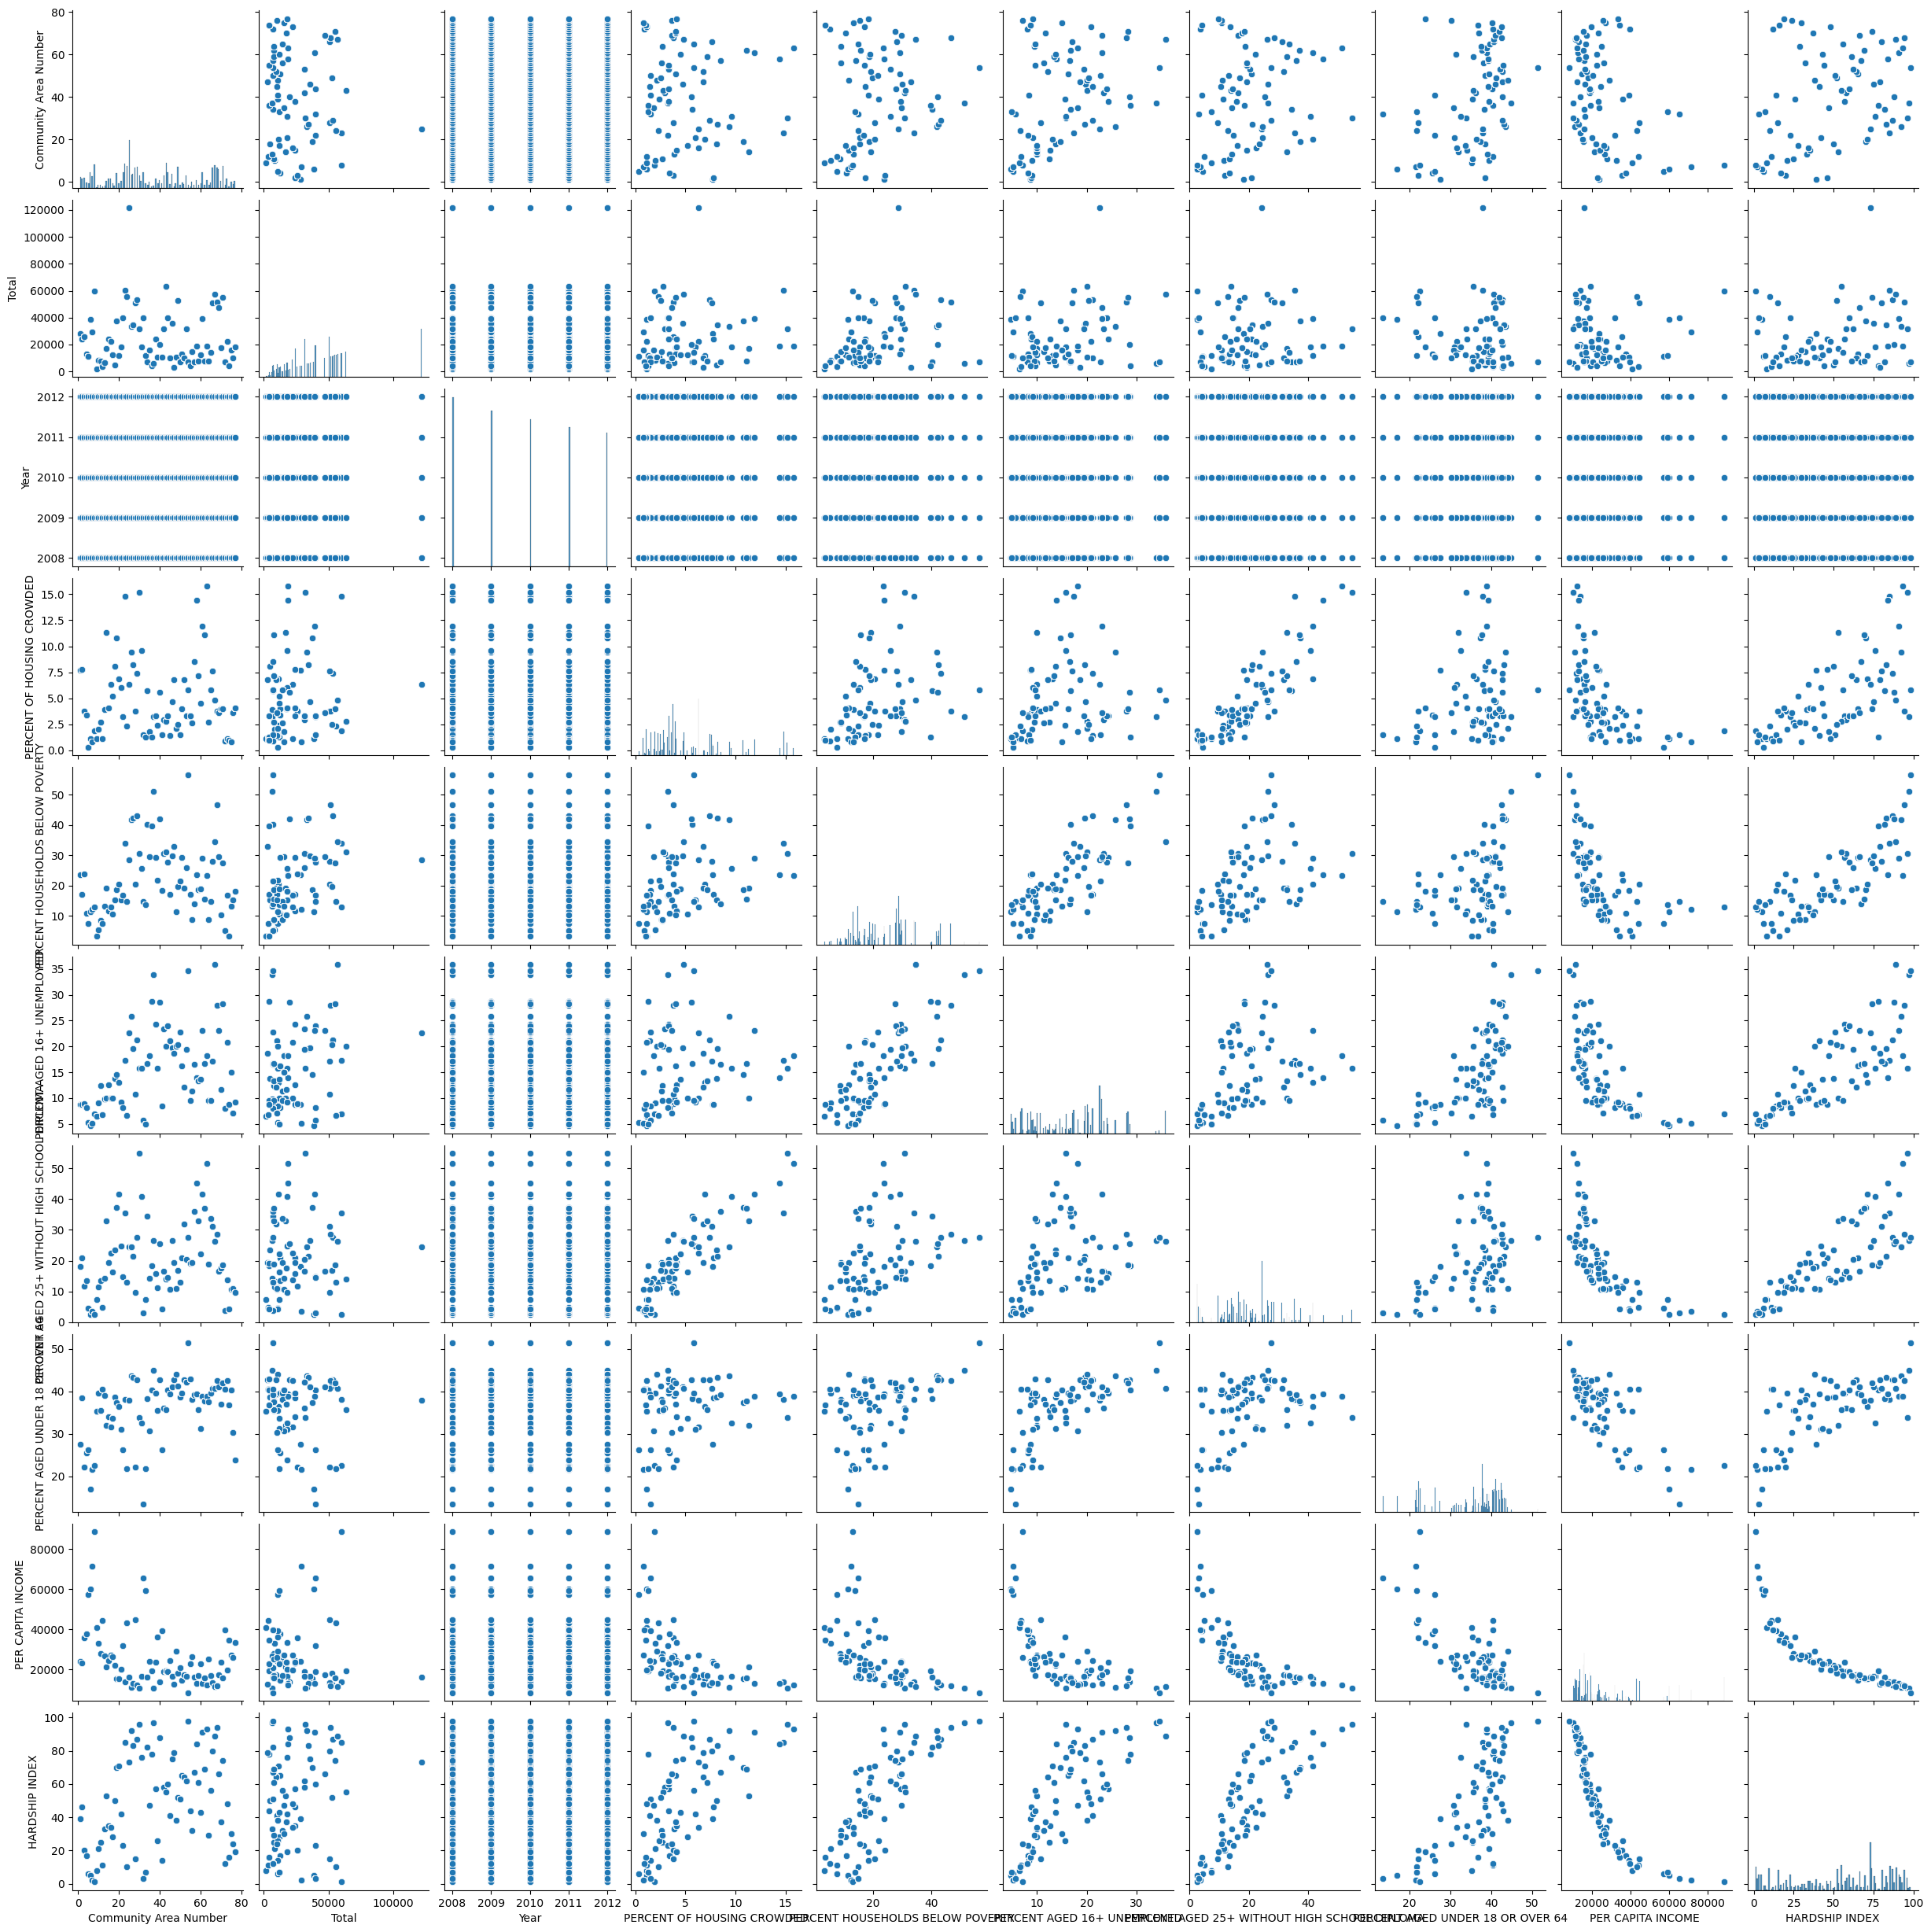

In [ ]:
sns.pairplot(merged_sesdata)

In [49]:
y = merged_sesdata['Total'].values.reshape(-1, 1)
x = merged_sesdata['HARDSHIP INDEX'].values.reshape(-1, 1)

In [40]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [41]:
model = LinearRegression().fit(x, y)
predictions = model.predict(x)
model.coef_
model.intercept_
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

intercept: [30644.49842839]
coefficients: [[200.87091718]]


In [42]:
r_sq = model.score(x, y)
r_sq

0.04829591447691384

Text(0.5, 1.0, 'Total Number of Reported Cases and Hardship Index')

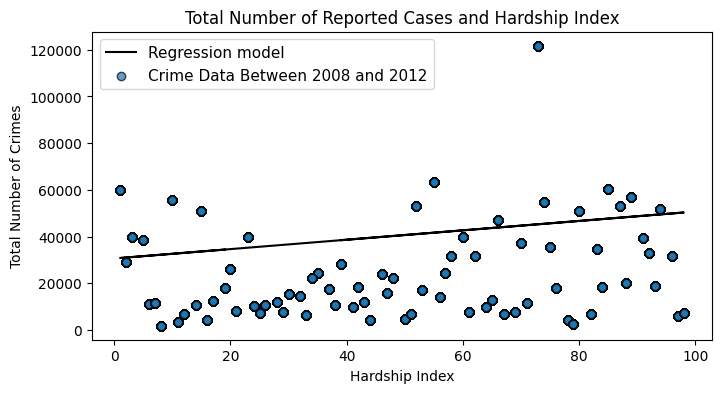

In [50]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, predictions, color='Black', label='Regression model')
ax.scatter(x, y, edgecolor='Black', alpha=0.7, label='Crime Data Between 2008 and 2012')
ax.set_ylabel('Total Number of Crimes', fontsize=10)
ax.set_xlabel('Hardship Index', fontsize=10)
ax.legend(facecolor='White', fontsize=11)
ax.set_title("Total Number of Reported Cases and Hardship Index")

In [22]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                 9.530e+04
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:30:35   Log-Likelihood:            -2.1789e+07
No. Observations:             1878023   AIC:                         4.358e+07
Df Residuals:                 1878021   BIC:                         4.358e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.064e+04     40.212    762.082      0.0

In [45]:
y = merged_sesdata['Total'].values.reshape(-1, 1)
x_below_poverty = merged_sesdata['PERCENT HOUSEHOLDS BELOW POVERTY'].values.reshape(-1, 1)

In [46]:
model_below_poverty = LinearRegression().fit(x_below_poverty, y)
predictions_below_poverty = model_below_poverty.predict(x_below_poverty)
model_below_poverty.coef_
model_below_poverty.intercept_
print(f"intercept: {model_below_poverty.intercept_}")
print(f"coefficients: {model_below_poverty.coef_}")

intercept: [22554.55272516]
coefficients: [[770.81163717]]


In [47]:
r_sq_below_poverty = model_below_poverty.score(x_below_poverty, y)
r_sq_below_poverty

0.08422660768827106

<ipython-input-54-f80a881a756c>:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()


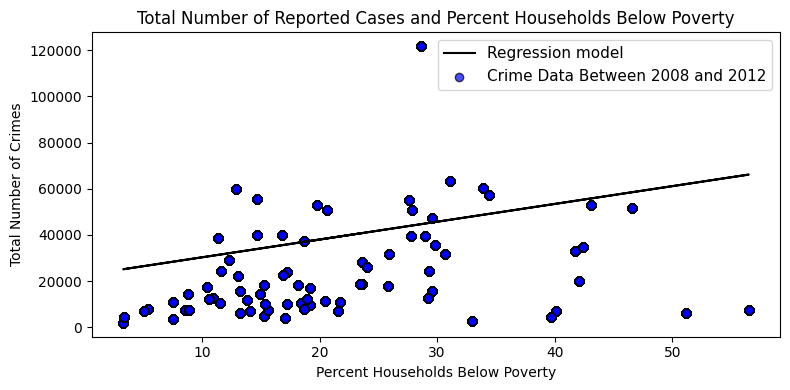

In [54]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x_below_poverty, predictions_below_poverty, color='Black', label='Regression model')
ax.scatter(x_below_poverty, y, edgecolor='Black', facecolor = 'Blue', alpha=0.7, label='Crime Data Between 2008 and 2012')
ax.set_ylabel('Total Number of Crimes', fontsize=10)
ax.set_xlabel('Percent Households Below Poverty', fontsize=10)
ax.legend(facecolor='white', fontsize=11)
ax.set_title("Total Number of Reported Cases and Percent Households Below Poverty")

fig.tight_layout()

In [33]:
x_below_poverty = sm.add_constant(x_below_poverty)
model_below_poverty = sm.OLS(y, x_below_poverty).fit()
print(model_below_poverty.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                 1.727e+05
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:52:04   Log-Likelihood:            -2.1753e+07
No. Observations:             1878023   AIC:                         4.351e+07
Df Residuals:                 1878021   BIC:                         4.351e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.255e+04     49.438    456.218      0.0

In [34]:
x_income = merged_sesdata['PER CAPITA INCOME '].values.reshape(-1, 1)

In [35]:
model_income = LinearRegression().fit(x_income, y)
predictions_income= model_income.predict(x_income)
model_income.coef_
model_income.intercept_
print(f"intercept: {model_income.intercept_}")
print(f"coefficients: {model_income.coef_}")

intercept: [44040.95025416]
coefficients: [[-0.09847648]]


In [36]:
r_sq_income = model_income.score(x_income, y)
r_sq_income

0.004354097933194412

Text(0.5, 1.0, 'Total Number of Reported Cases and Per Capita Income')

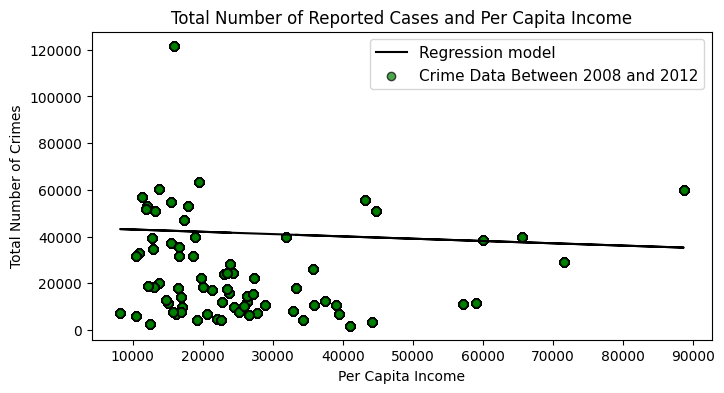

In [55]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x_income, predictions_income, color='Black', label='Regression model')
ax.scatter(x_income, y, edgecolor='Black', facecolor = 'Green', alpha=0.7, label='Crime Data Between 2008 and 2012')
ax.set_ylabel('Total Number of Crimes', fontsize=10)
ax.set_xlabel('Per Capita Income', fontsize=10)
ax.legend(facecolor='White', fontsize=11)
ax.set_title("Total Number of Reported Cases and Per Capita Income")

In [56]:
x_income = sm.add_constant(x_income)
model_income = sm.OLS(y, x_income).fit()
print(model_income.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     8213.
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:10:26   Log-Likelihood:            -2.1832e+07
No. Observations:             1878023   AIC:                         4.366e+07
Df Residuals:                 1878021   BIC:                         4.366e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.404e+04     33.993   1295.595      0.0

In [ ]:
import geopandas as gpd

In [ ]:
!apt install python3-cartopy
!pip install geoplot

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
import geoplot as gplt

In [ ]:
community_area_map = gpd.read_file('/content/Boundaries - Community Areas (current).geojson')
gplt.polyplot(community_area_map, figsize=(10, 8))

In [ ]:
community_area_map.info()

In [ ]:
community_area_map['area_numbe'] = community_area_map['area_numbe'].astype("Int64")
crime['Community Area'] = crime['Community Area'].astype("Int64")

In [ ]:
crime.isnull().sum()

In [ ]:
crime['Total_by_CommunityArea']= crime.groupby('Community Area')['Case Number'].transform('count')
crime_total = crime[['Community Area', 'Total_by_CommunityArea']].drop_duplicates(keep='first')
crime_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 17340
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Community Area          78 non-null     Int64  
 1   Total_by_CommunityArea  78 non-null     float64
dtypes: Int64(1), float64(1)
memory usage: 1.9 KB


In [ ]:
crime_total.sort_values(by='Community Area')

In [ ]:
crime_total['Total_by_CommunityArea'].sum()

7390642.0

In [ ]:
map_data = community_area_map.merge(crime_total, left_on='area_numbe', right_on = 'Community Area')

In [ ]:
import mapclassify as mc
scheme = mc.Quantiles(map_data['Total_by_CommunityArea'], k=10)

/usr/local/lib/python3.10/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<Axes: >

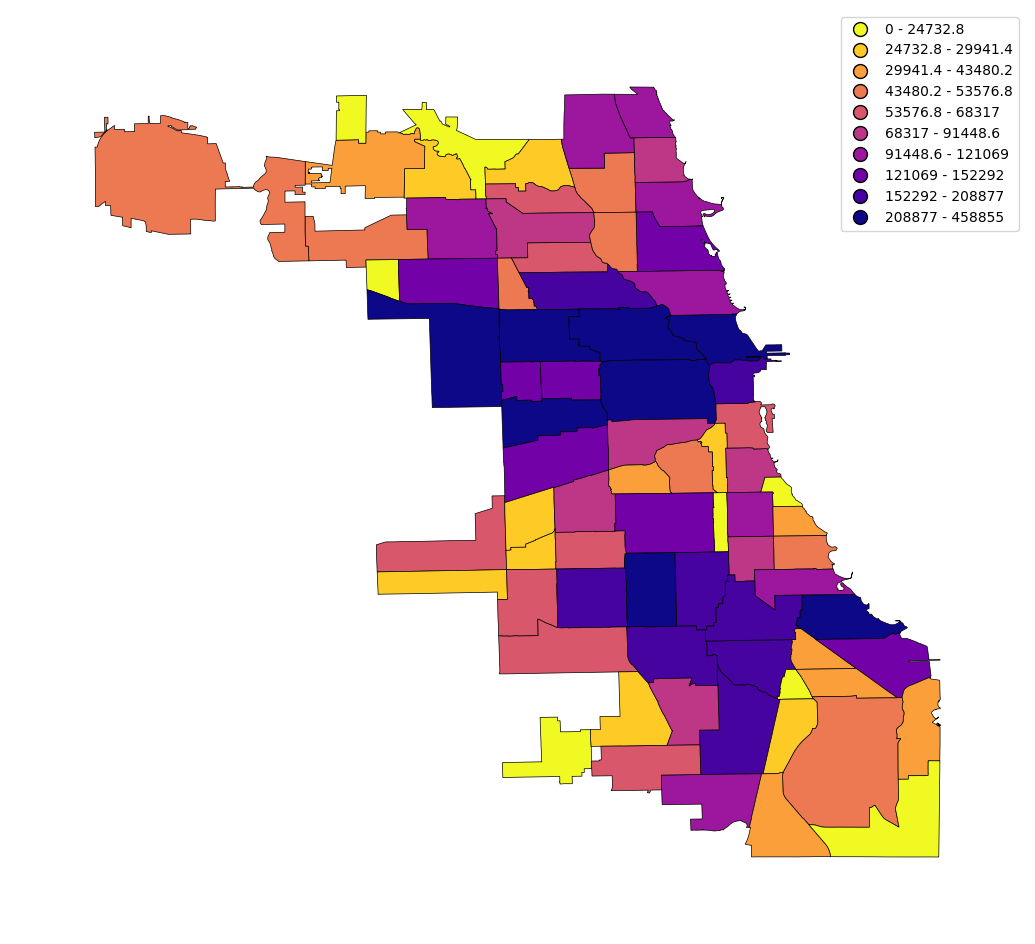

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
gplt.choropleth(map_data, hue="Total_by_CommunityArea", linewidth=.5, scheme=scheme, cmap='plasma_r', legend=True, edgecolor='black', ax=ax)

In [ ]:
ses.info()

In [ ]:
#crime data between year 2008 and year 2012 to make socioeconomic indicator data
ses['Community Area Number'] = ses['Community Area Number'].astype("Int64")
map_data_2 = community_area_map.merge(ses, left_on='area_numbe', right_on = 'Community Area Number')
map_data_2.info()

In [ ]:
scheme_past = mc.Quantiles(map_data_2['Total'], k=8)

/usr/local/lib/python3.10/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<Axes: >

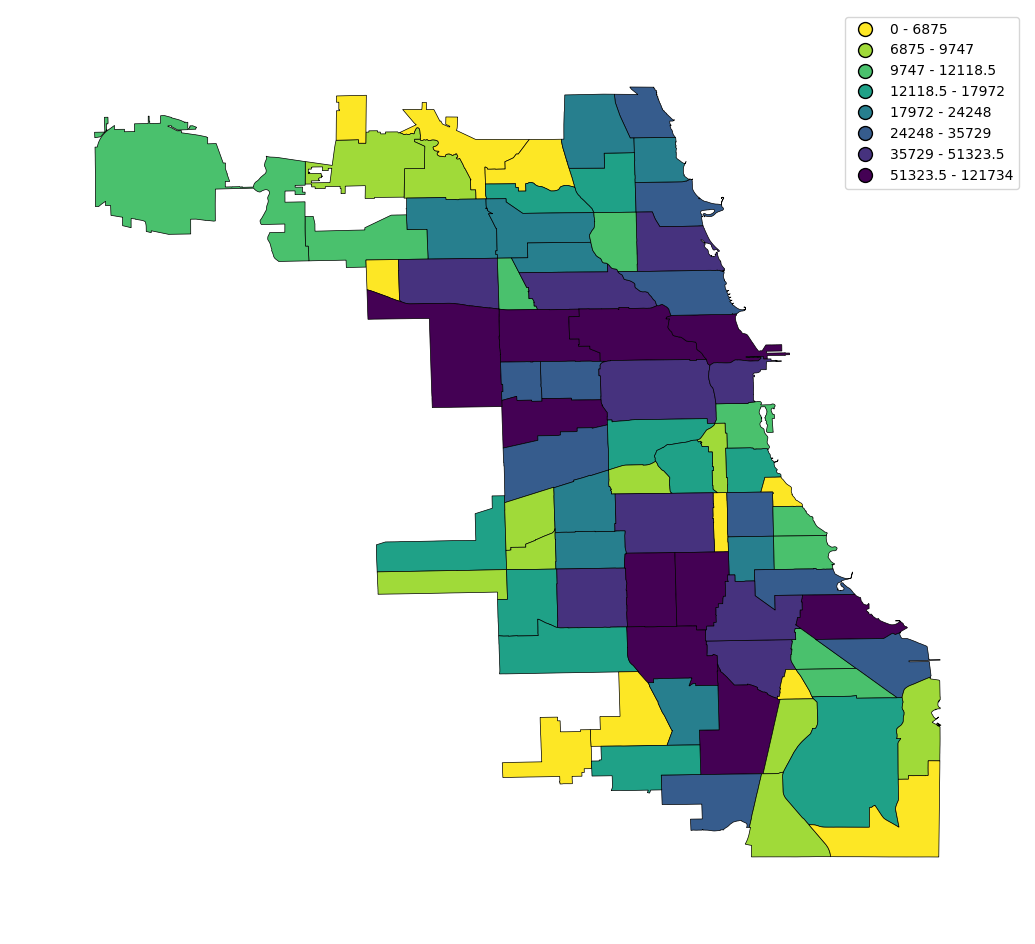

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
gplt.choropleth(map_data_2, hue="Total", linewidth=.5, scheme=scheme_past, cmap = 'viridis_r', legend=True, edgecolor='black', ax=ax)

In [ ]:
#map out hardship index by community areas
community_area_map['area_numbe'] = community_area_map['area_numbe'].astype("Int64")
sesdata['Community Area Number'] = sesdata['Community Area Number'].astype("Int64")
map_data_hardship = community_area_map.merge(sesdata, left_on='area_numbe', right_on = 'Community Area Number')

In [ ]:
sesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Community Area Number                         77 non-null     Int64  
 1   COMMUNITY AREA NAME                           78 non-null     object 
 2   PERCENT OF HOUSING CROWDED                    78 non-null     float64
 3   PERCENT HOUSEHOLDS BELOW POVERTY              78 non-null     float64
 4   PERCENT AGED 16+ UNEMPLOYED                   78 non-null     float64
 5   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  78 non-null     float64
 6   PERCENT AGED UNDER 18 OR OVER 64              78 non-null     float64
 7   PER CAPITA INCOME                             78 non-null     int64  
 8   HARDSHIP INDEX                                77 non-null     float64
dtypes: Int64(1), float64(6), int64(1), object(1)
memory usage: 5.7+ KB


In [ ]:
scheme_hardship = mc.Quantiles(map_data_hardship['HARDSHIP INDEX'], k=8)

/usr/local/lib/python3.10/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<Axes: >

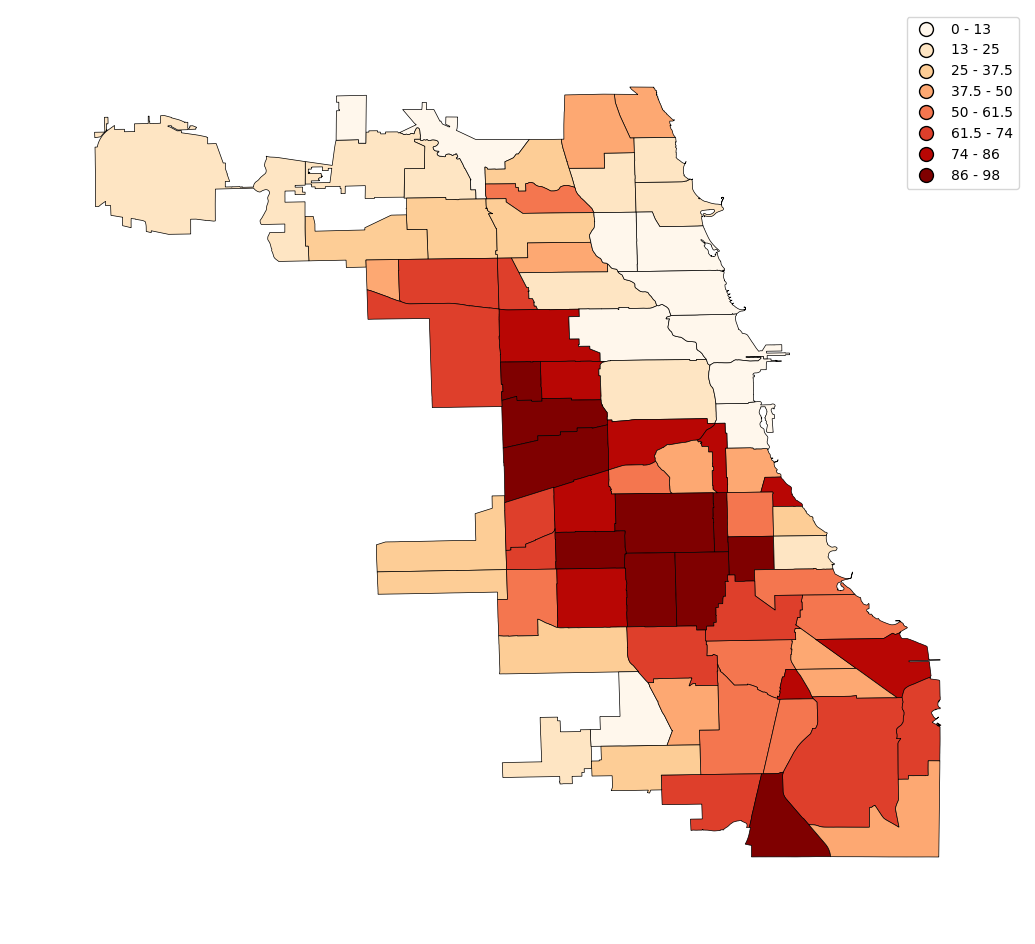

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
gplt.choropleth(map_data_hardship, hue="HARDSHIP INDEX", linewidth=.5, scheme=scheme_hardship, cmap = 'OrRd', legend=True, edgecolor='black', ax=ax)